# BUSINESS UNDERSTANDING

##  OBJECTIVE

The company is launching a new movie studio and seeks to produce films that achieve both high box office performance and strong audience appeal. By analyzing existing market trends, the aim is to identify the types of films that are most successful, using insights from genres, budgets, ratings, and revenue data. These findings will guide decisions on what types of films to create, ensuring a profitable and competitive entry into the film industry.

##  WHY NOW

The movie industry is experiencing strong growth and presents a strategic opportunity for entry:

### **Revenue Growth:**

Global box office revenue rebounded to 26 billion dollars in 2023 and is projected to reach 50 billion dollars by 2030, driven by increasing theatrical attendance and international market expansion.

### **Genre and Market Trends:**
Action, superhero, and adventure films remain dominant, contributing to over 70% of box office revenue in 2023. Low-budget horror films, however, continue to achieve impressive 200-300% ROI, offering a lucrative segment for new studios.

### **Audience Engagement:**

Movies with IMDb ratings above 7.5 generate up to 40% more revenue.
Films with significant audience engagement (100,000+ votes) tend to outperform others both domestically and internationally.

##  KEY BUSINESS QUESTIONS
1.Which genres and themes consistently lead to high box office performance?

2.How do production budgets influence profitability and ROI?

3.What impact do ratings and audience engagement have on revenue and success?

4.How does the balance between domestic and international revenue vary across genres and film types?

5.What are the most profitable times of the year to release films?

## SUCCESS CRITERIA
**1.Identify Profitable Genres:**

Analyze box office data to determine which genres and themes perform best.

**2.Optimize Budget Allocation:**

Assess the relationship between production budgets and ROI to establish profitable budget ranges.

**3.Leverage Ratings and Engagement:**

Explore the correlation between IMDb ratings, audience votes, and box office success to identify quality benchmarks.

**4.Understand Revenue Composition:**

Evaluate the contribution of domestic vs. international markets to total revenue for different genres.

**5.Determine Strategic Release Windows:**

Identify the best months or quarters to release films for maximum profitability. 

# DATA UNDERSTANDING
###  OVERVIEW
The datasets focus on analyzing key factors influencing movie success, aligning with the business objective of creating commercially successful and audience-captivating films. The following data sources and variables will address the outlined business questions:

###  IMDb: Movie Basics
This table provides foundational information about movies, critical for understanding trends in genres, runtime, and release years.

*Columns:*

**movie_id:** Unique identifier for each movie (joins with movie_ratings).

**primary_title:** Official title of the movie (used for identification in analysis).

**original_title:** Native language title, useful for analyzing the influence of language on commercial success.

**start_year:** Year of release, enabling exploration of time-based trends (e.g., genre popularity, seasonal releases).

**runtime_minutes:** Movie length, used to determine if runtime influences audience engagement and box office performance.

**genres:** Genres of the movie, critical for identifying commercially successful themes and trends.

*Key Uses:*

Address Q1: "What genres and themes consistently lead to box office success?"

Address Q5: What are the most profitable times of the year to release films?

###  IMDb: Movie Ratings

This table offers insights into audience reception and engagement metrics, which are critical for understanding the role of ratings and votes in a movie's financial performance.

*Columns:*

**movie_id:** Unique identifier for each movie (joins with movie_basics).

**averagerating:** Average IMDb rating, useful for gauging critical acclaim and audience satisfaction.

**numvotes:** Number of votes received, indicating audience engagement and popularity.

*Key Uses:*

Address Q3: "What impact do ratings and audience engagement have on revenue and success??"


###  The Numbers: Budget Data

This table provides production budget details and global revenue, essential for ROI and profitability analysis.

*Columns:*

**movie:** Name of the movie.

**production_budget:** Cost of production, enabling the evaluation of budget-performance relationships.

**domestic_gross:** Domestic revenue.

**worldwide_gross:** Total revenue globally.

*Key Uses:*

Address Q2: "How do production budgets influence profitability and ROI?"

Address Q4: "4.How does the balance between domestic and international revenue vary across genres and film types?"

### . TMDb: Additional Metadata

This dataset supplements IMDb data with information about popularity and audience ratings.

*Columns:*

**original_language:** Language of the film, supporting analysis of language preferences.

**genre_ids:** Genre categorization (used alongside IMDb genres).

**vote_average and vote_count:** Audience ratings and engagement metrics.

**release_date:** Exact release date, supporting seasonal and trend analysis.

*Key Uses:*

Address Q3: Analyze audience engagement and its effect on financial performance.



# Data Collection
To make informed decisions about the types of films to produce, we need to gather relevant data from various sources. The following types of data will be essential:
 * the imbd dataset(here we will only take two tables i.e movie_basics and movie_ratings)
 * tmbd dataset
 * tn_budget dataset

we'd then combine the dataset to one

## importing datasets 

In [1]:
#load necessary libraries
import sqlite3
import pandas as pd
import numpy as np 

In [2]:
db_path = "im.db"

# Connect to the database
with sqlite3.connect(db_path) as conn:
    cursor = conn.cursor()
    
    # Get list of available tables
    cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
    available_tables = {row[0] for row in cursor.fetchall()}  # Convert to set
    
    print("Available tables:", available_tables)

    # Define expected tables
    tables = ["movie_basics", "directors", "known_for", "movie_akas",
              "movie_ratings", "persons", "principals", "writers"]

    # Load only existing tables
    dataframes = {
        table: pd.read_sql_query(f"SELECT * FROM {table}", conn)
        for table in tables if table in available_tables
    }

# Print which tables were loaded successfully
print("Loaded tables:", list(dataframes.keys()))

Available tables: {'movie_akas', 'writers', 'movie_basics', 'principals', 'persons', 'directors', 'movie_ratings', 'known_for'}
Loaded tables: ['movie_basics', 'directors', 'known_for', 'movie_akas', 'movie_ratings', 'persons', 'principals', 'writers']


In [3]:
# Access movie_basics table
movie_basics = dataframes["movie_basics"]
# Display the movie_basic DataFrame
print("\nmovie_basic DataFrame:")
movie_basics.head()


movie_basic DataFrame:


,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [4]:
# access movie_ratings table
movie_ratings=dataframes['movie_ratings']
# Display the movie_ratings DataFrame
print("\nmovie_ratings DataFrame:")
movie_ratings.head()


movie_ratings DataFrame:


,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


## merged_df
joining movie_basics and movie_ratings as merged_df

In [5]:
#check the movie_rating dataset info
movie_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   movie_id       73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


In [6]:
#check the movie_basics dataset info
movie_basics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   movie_id         146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


The movie ratings dataset is quite clean while the movie basic dataset contains missing values from the columns: original_title,runtime_minutes and genres. The next step is to input the missing values and drop the irrelevant columns like and original_title

In [7]:
#dropping the original_title column
movie_basics.drop(columns=['original_title'], inplace=True)

In [8]:
#handling missing values in runtime_minutes
movie_basics['runtime_minutes']=movie_basics['runtime_minutes'].fillna(movie_basics['runtime_minutes'].median())
#handling missing values for genres
movie_basics['genres']=movie_basics['genres'].fillna('Unkown')

In [9]:
# Merge the DataFrames based on 'movie_id' in movie_ratings and  movie_basics
merged_df = pd.merge(movie_basics,movie_ratings, left_on='movie_id', right_on='movie_id', how='inner')

# Display the merged DataFrame
print("\nMerged DataFrame:")
merged_df.head()


Merged DataFrame:


,movie_id,primary_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,2018,87.0,"Comedy,Drama",6.1,13
4,tt0100275,The Wandering Soap Opera,2017,80.0,"Comedy,Drama,Fantasy",6.5,119


## merged_df1
joining tmbd_movies to merged_df1

In [10]:
#load the dataset
tmbd_movies=pd.read_csv('tmdb.movies.csv')
# Display the merged DataFrame
print("\ntmbd_movies DataFrame:")
tmbd_movies.head()


tmbd_movies DataFrame:


,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [11]:
#dropping columns
tmbd_movies.drop(columns=['Unnamed: 0','genre_ids','id'], inplace=True)

In [12]:
#display dataset info
tmbd_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   original_language  26517 non-null  object 
 1   original_title     26517 non-null  object 
 2   popularity         26517 non-null  float64
 3   release_date       26517 non-null  object 
 4   title              26517 non-null  object 
 5   vote_average       26517 non-null  float64
 6   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 1.4+ MB


In [13]:
# Merge the DataFrames based on 'primary_title' in merged_df and 'title' in bom_movies
merged_df1 = pd.merge(merged_df,tmbd_movies, left_on='primary_title', right_on='title', how='inner')

# Display the merged DataFrame
print("\nMerged DataFrame1:")
merged_df1.head()


Merged DataFrame1:


,movie_id,primary_title,start_year,runtime_minutes,genres,averagerating,numvotes,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,tt0069049,The Other Side of the Wind,2018,122.0,Drama,6.9,4517,en,The Other Side of the Wind,9.800,2018-11-02,The Other Side of the Wind,7.0,64
1,tt0112502,Bigfoot,2017,87.0,"Horror,Thriller",4.1,32,en,Bigfoot,2.813,2012-06-30,Bigfoot,2.9,26
2,tt4503112,Bigfoot,2018,87.0,"Action,Horror",4.6,9,en,Bigfoot,2.813,2012-06-30,Bigfoot,2.9,26
3,tt9181914,Bigfoot,2018,86.0,"Animation,Family",2.5,55,en,Bigfoot,2.813,2012-06-30,Bigfoot,2.9,26
4,tt0192528,Heaven & Hell,2018,104.0,Drama,4.0,72,en,Heaven & Hell,0.600,2018-11-06,Heaven & Hell,7.5,2


In [14]:
#display merged dataset info
merged_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19949 entries, 0 to 19948
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   movie_id           19949 non-null  object 
 1   primary_title      19949 non-null  object 
 2   start_year         19949 non-null  int64  
 3   runtime_minutes    19949 non-null  float64
 4   genres             19949 non-null  object 
 5   averagerating      19949 non-null  float64
 6   numvotes           19949 non-null  int64  
 7   original_language  19949 non-null  object 
 8   original_title     19949 non-null  object 
 9   popularity         19949 non-null  float64
 10  release_date       19949 non-null  object 
 11  title              19949 non-null  object 
 12  vote_average       19949 non-null  float64
 13  vote_count         19949 non-null  int64  
dtypes: float64(4), int64(3), object(7)
memory usage: 2.1+ MB


## merged_df2
joining tn_budget to merged_df1

In [15]:
#load the dataset
tn_budget=pd.read_csv('tn.movie_budgets.csv')
# Display the merged DataFrame
print("\ntn_budget DataFrame1:")
tn_budget.head()


tn_budget DataFrame1:


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [16]:
#dropping id column
tn_budget.drop(columns=['id'], inplace=True)

In [17]:
#view dataset info
tn_budget.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   release_date       5782 non-null   object
 1   movie              5782 non-null   object
 2   production_budget  5782 non-null   object
 3   domestic_gross     5782 non-null   object
 4   worldwide_gross    5782 non-null   object
dtypes: object(5)
memory usage: 226.0+ KB


In [18]:
# Merge the DataFrames based on 'primary_title' in merged_df and 'title' in bom_movies
merged_df2 = pd.merge(merged_df1,tn_budget, left_on='primary_title', right_on='movie', how='inner')

# Display the merged DataFrame
print("\nMerged DataFrame2:")
merged_df2.head()


Merged DataFrame2:


,movie_id,primary_title,start_year,runtime_minutes,genres,averagerating,numvotes,original_language,original_title,popularity,release_date_x,title,vote_average,vote_count,release_date_y,movie,production_budget,domestic_gross,worldwide_gross
0,tt0249516,Foodfight!,2012,91.0,"Action,Animation,Comedy",1.9,8248,en,Foodfight!,4.705,2013-05-07,Foodfight!,2.1,46,"Dec 31, 2012",Foodfight!,"$45,000,000",$0,"$73,706"
1,tt0326592,The Overnight,2010,88.0,Unkown,7.5,24,en,The Overnight,6.576,2015-06-19,The Overnight,6.0,200,"Jun 19, 2015",The Overnight,"$200,000","$1,109,808","$1,165,996"
2,tt3844362,The Overnight,2015,79.0,"Comedy,Mystery",6.1,14828,en,The Overnight,6.576,2015-06-19,The Overnight,6.0,200,"Jun 19, 2015",The Overnight,"$200,000","$1,109,808","$1,165,996"
3,tt0337692,On the Road,2012,124.0,"Adventure,Drama,Romance",6.1,37886,en,On the Road,8.919,2012-12-21,On the Road,5.6,518,"Mar 22, 2013",On the Road,"$25,000,000","$720,828","$9,313,302"
4,tt4339118,On the Road,2014,89.0,Drama,6.0,6,en,On the Road,8.919,2012-12-21,On the Road,5.6,518,"Mar 22, 2013",On the Road,"$25,000,000","$720,828","$9,313,302"


In [19]:
#display dataset info
merged_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3361 entries, 0 to 3360
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   movie_id           3361 non-null   object 
 1   primary_title      3361 non-null   object 
 2   start_year         3361 non-null   int64  
 3   runtime_minutes    3361 non-null   float64
 4   genres             3361 non-null   object 
 5   averagerating      3361 non-null   float64
 6   numvotes           3361 non-null   int64  
 7   original_language  3361 non-null   object 
 8   original_title     3361 non-null   object 
 9   popularity         3361 non-null   float64
 10  release_date_x     3361 non-null   object 
 11  title              3361 non-null   object 
 12  vote_average       3361 non-null   float64
 13  vote_count         3361 non-null   int64  
 14  release_date_y     3361 non-null   object 
 15  movie              3361 non-null   object 
 16  production_budget  3361 

In [20]:
# Save the DataFrame to a CSV file
merged_df2.to_csv('combined_dataset.csv', index=False)

# Data preparation
## Data Cleaning
This includes
* exploring our data using methods like(df.head,df.describe,df.info)to get a sense of the data structure,data types and summary statistics
* manipulating column names for better readability
* dropping unnecessary columns
* identify missing values using df.isnull().sum() then fill the missing values appropriately if any,or drop them
* identify duplicates(df.duplicated() and remove them using df.drop_duplicated
* check the data types if they are appropriate for each column if not correct them
* check and handle outliers appropriately
* create new features
* do final checks then save the cleaned data

### Explore the data
This is done to get a sense of the data structure,data types and summary statistics

#### view the dataset
to see how our data looks like

In [21]:
#load the combined dataset
combined=pd.read_csv('combined_dataset.csv')
#view the dataset
combined.head()

,movie_id,primary_title,start_year,runtime_minutes,genres,averagerating,numvotes,original_language,original_title,popularity,release_date_x,title,vote_average,vote_count,release_date_y,movie,production_budget,domestic_gross,worldwide_gross
0,tt0249516,Foodfight!,2012,91.0,"Action,Animation,Comedy",1.9,8248,en,Foodfight!,4.705,2013-05-07,Foodfight!,2.1,46,"Dec 31, 2012",Foodfight!,"$45,000,000",$0,"$73,706"
1,tt0326592,The Overnight,2010,88.0,Unkown,7.5,24,en,The Overnight,6.576,2015-06-19,The Overnight,6.0,200,"Jun 19, 2015",The Overnight,"$200,000","$1,109,808","$1,165,996"
2,tt3844362,The Overnight,2015,79.0,"Comedy,Mystery",6.1,14828,en,The Overnight,6.576,2015-06-19,The Overnight,6.0,200,"Jun 19, 2015",The Overnight,"$200,000","$1,109,808","$1,165,996"
3,tt0337692,On the Road,2012,124.0,"Adventure,Drama,Romance",6.1,37886,en,On the Road,8.919,2012-12-21,On the Road,5.6,518,"Mar 22, 2013",On the Road,"$25,000,000","$720,828","$9,313,302"
4,tt4339118,On the Road,2014,89.0,Drama,6.0,6,en,On the Road,8.919,2012-12-21,On the Road,5.6,518,"Mar 22, 2013",On the Road,"$25,000,000","$720,828","$9,313,302"


#### get statistic summary for our dataset

In [22]:
#view statistics for our dataset
combined.describe()

,start_year,runtime_minutes,averagerating,numvotes,popularity,vote_average,vote_count
count,3361.000000,3361.000000,3361.000000,3.361000e+03,3361.000000,3361.000000,3361.000000
mean,2013.939601,102.645641,6.294347,6.862621e+04,9.022082,6.158643,1383.335019
std,2.490502,20.396231,1.178406,1.330570e+05,8.167201,1.271010,2485.514931
min,2010.000000,3.000000,1.600000,5.000000e+00,0.600000,0.000000,1.000000
25%,2012.000000,90.000000,5.700000,1.830000e+02,1.823000,5.500000,11.000000
50%,2014.000000,100.000000,6.400000,8.553000e+03,8.166000,6.200000,312.000000
75%,2016.000000,113.000000,7.100000,8.300900e+04,12.817000,7.000000,1684.000000
max,2019.000000,280.000000,9.300000,1.841066e+06,80.773000,10.000000,22186.000000


In [23]:
#summary statistic for numerical columns
combined.describe(include='O')

,movie_id,primary_title,genres,original_language,original_title,release_date_x,title,release_date_y,movie,production_budget,domestic_gross,worldwide_gross
count,3361,3361,3361,3361,3361,3361,3361,3361,3361,3361,3361,3361
unique,2315,1779,292,31,1821,956,1779,794,1779,288,1614,1680
top,tt2075392,Home,Drama,en,Home,2015-06-19,Home,"Mar 27, 2015",Home,"$10,000,000",$0,$0
freq,21,168,427,3123,144,42,168,59,168,166,470,357


#### dataset info

In [24]:
#checking dataset info
combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3361 entries, 0 to 3360
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   movie_id           3361 non-null   object 
 1   primary_title      3361 non-null   object 
 2   start_year         3361 non-null   int64  
 3   runtime_minutes    3361 non-null   float64
 4   genres             3361 non-null   object 
 5   averagerating      3361 non-null   float64
 6   numvotes           3361 non-null   int64  
 7   original_language  3361 non-null   object 
 8   original_title     3361 non-null   object 
 9   popularity         3361 non-null   float64
 10  release_date_x     3361 non-null   object 
 11  title              3361 non-null   object 
 12  vote_average       3361 non-null   float64
 13  vote_count         3361 non-null   int64  
 14  release_date_y     3361 non-null   object 
 15  movie              3361 non-null   object 
 16  production_budget  3361 

### Column manipulation
now that we have a sense of how our data is lets begin with column manipulation.

this includes:checking column names to see they are same,change the name to lowercase if necessary,remove whitespaces in the column names and also in the data,rename columns for better understanding and drop unnecessary columns.

#### check column names

In [25]:
#check columns
combined.columns

Index(['movie_id', 'primary_title', 'start_year', 'runtime_minutes', 'genres',
       'averagerating', 'numvotes', 'original_language', 'original_title',
       'popularity', 'release_date_x', 'title', 'vote_average', 'vote_count',
       'release_date_y', 'movie', 'production_budget', 'domestic_gross',
       'worldwide_gross'],
      dtype='object')

#### remove whitespaces
Here we are removing the whitepaces found in the column names and ensure that all string and categorical values are clean and consistent

In [26]:
# Strip white spaces in values 
combined = combined.apply(lambda col: col.str.strip() if col.dtype == ["object", "number", "category"] else col)
combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3361 entries, 0 to 3360
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   movie_id           3361 non-null   object 
 1   primary_title      3361 non-null   object 
 2   start_year         3361 non-null   int64  
 3   runtime_minutes    3361 non-null   float64
 4   genres             3361 non-null   object 
 5   averagerating      3361 non-null   float64
 6   numvotes           3361 non-null   int64  
 7   original_language  3361 non-null   object 
 8   original_title     3361 non-null   object 
 9   popularity         3361 non-null   float64
 10  release_date_x     3361 non-null   object 
 11  title              3361 non-null   object 
 12  vote_average       3361 non-null   float64
 13  vote_count         3361 non-null   int64  
 14  release_date_y     3361 non-null   object 
 15  movie              3361 non-null   object 
 16  production_budget  3361 

#### renaming columns

In [27]:
#renaming column names
combined = combined.rename(columns = {'averagerating':'average_ratings', 'movie_id':'id','numvotes':'number_of_votes','release_date_x':'release_date'})
#check column names
combined.columns

Index(['id', 'primary_title', 'start_year', 'runtime_minutes', 'genres',
       'average_ratings', 'number_of_votes', 'original_language',
       'original_title', 'popularity', 'release_date', 'title', 'vote_average',
       'vote_count', 'release_date_y', 'movie', 'production_budget',
       'domestic_gross', 'worldwide_gross'],
      dtype='object')

#### drop unnecessary columns

In [28]:
#drop unnecessary columns
combined = combined.drop(columns=['id', 'primary_title', 'start_year','original_language', 'popularity', 
                          'original_title','release_date_y','movie','vote_count', 'id_x', 'vote_average' ], errors="ignore")
#view the dataset
combined.head()

,runtime_minutes,genres,average_ratings,number_of_votes,release_date,title,production_budget,domestic_gross,worldwide_gross
0,91.0,"Action,Animation,Comedy",1.9,8248,2013-05-07,Foodfight!,"$45,000,000",$0,"$73,706"
1,88.0,Unkown,7.5,24,2015-06-19,The Overnight,"$200,000","$1,109,808","$1,165,996"
2,79.0,"Comedy,Mystery",6.1,14828,2015-06-19,The Overnight,"$200,000","$1,109,808","$1,165,996"
3,124.0,"Adventure,Drama,Romance",6.1,37886,2012-12-21,On the Road,"$25,000,000","$720,828","$9,313,302"
4,89.0,Drama,6.0,6,2012-12-21,On the Road,"$25,000,000","$720,828","$9,313,302"


#### removing dollar signs and commas in production_budget,domestic_gross,worldwide_gross

In [29]:
# Convert financial columns by removing $ and , then converting to numeric
def clean_currency_column(df, column):
    df[column] = df[column].replace(r'[\$,]', '', regex=True).astype(float)

# Apply cleaning function to relevant columns
for col in ['production_budget', 'domestic_gross', 'worldwide_gross']:
    clean_currency_column(combined, col)

# Verify changes
combined.head()


,runtime_minutes,genres,average_ratings,number_of_votes,release_date,title,production_budget,domestic_gross,worldwide_gross
0,91.0,"Action,Animation,Comedy",1.9,8248,2013-05-07,Foodfight!,45000000.0,0.0,73706.0
1,88.0,Unkown,7.5,24,2015-06-19,The Overnight,200000.0,1109808.0,1165996.0
2,79.0,"Comedy,Mystery",6.1,14828,2015-06-19,The Overnight,200000.0,1109808.0,1165996.0
3,124.0,"Adventure,Drama,Romance",6.1,37886,2012-12-21,On the Road,25000000.0,720828.0,9313302.0
4,89.0,Drama,6.0,6,2012-12-21,On the Road,25000000.0,720828.0,9313302.0


### Missing values

In [30]:
mis=combined.isna().any().sum()
if mis > 0:
    print(f'\nThere are {mis} missing values present in our data.')
else:
    print('There are no missing values in our data.')

There are no missing values in our data.


### Checking for duplicate

In [31]:
#check for duplicates
dup = combined.duplicated().sum()
if dup > 0:
    print(f'\nThere are {dup} duplicates present in our data.')
else:
    print('There are no duplicates in our data.')


There are 212 duplicates present in our data.


In [32]:
# Remove duplicates (inplace to modify the original DataFrame)
combined.drop_duplicates(inplace=True)

# Check for duplicates
dup = combined.duplicated().sum()
if dup > 0:
    print(f'\nThere are {dup} duplicates present in our data.')
else:
    print('There are no duplicates in our data.')

There are no duplicates in our data.


### Checking the data types
to see if they are appropriate for each column

In [33]:
combined.dtypes

runtime_minutes      float64
genres                object
average_ratings      float64
number_of_votes        int64
release_date          object
title                 object
production_budget    float64
domestic_gross       float64
worldwide_gross      float64
dtype: object

In [34]:
# Change data types
combined['runtime_minutes'] = combined['runtime_minutes'].astype('int64')
combined['average_ratings'] = combined['average_ratings'].astype('int64')
combined['release_date'] = pd.to_datetime(combined['release_date'])
combined['production_budget'] = combined['production_budget'].astype('int64')
combined['worldwide_gross'] = combined['worldwide_gross'].astype('int64')
combined['domestic_gross'] = combined['domestic_gross'].astype('int64')

# Display updated dtypes
print("\nUpdated Data Types:")
combined.dtypes


Updated Data Types:


runtime_minutes               int64
genres                       object
average_ratings               int64
number_of_votes               int64
release_date         datetime64[ns]
title                        object
production_budget             int64
domestic_gross                int64
worldwide_gross               int64
dtype: object

### Checking outliers

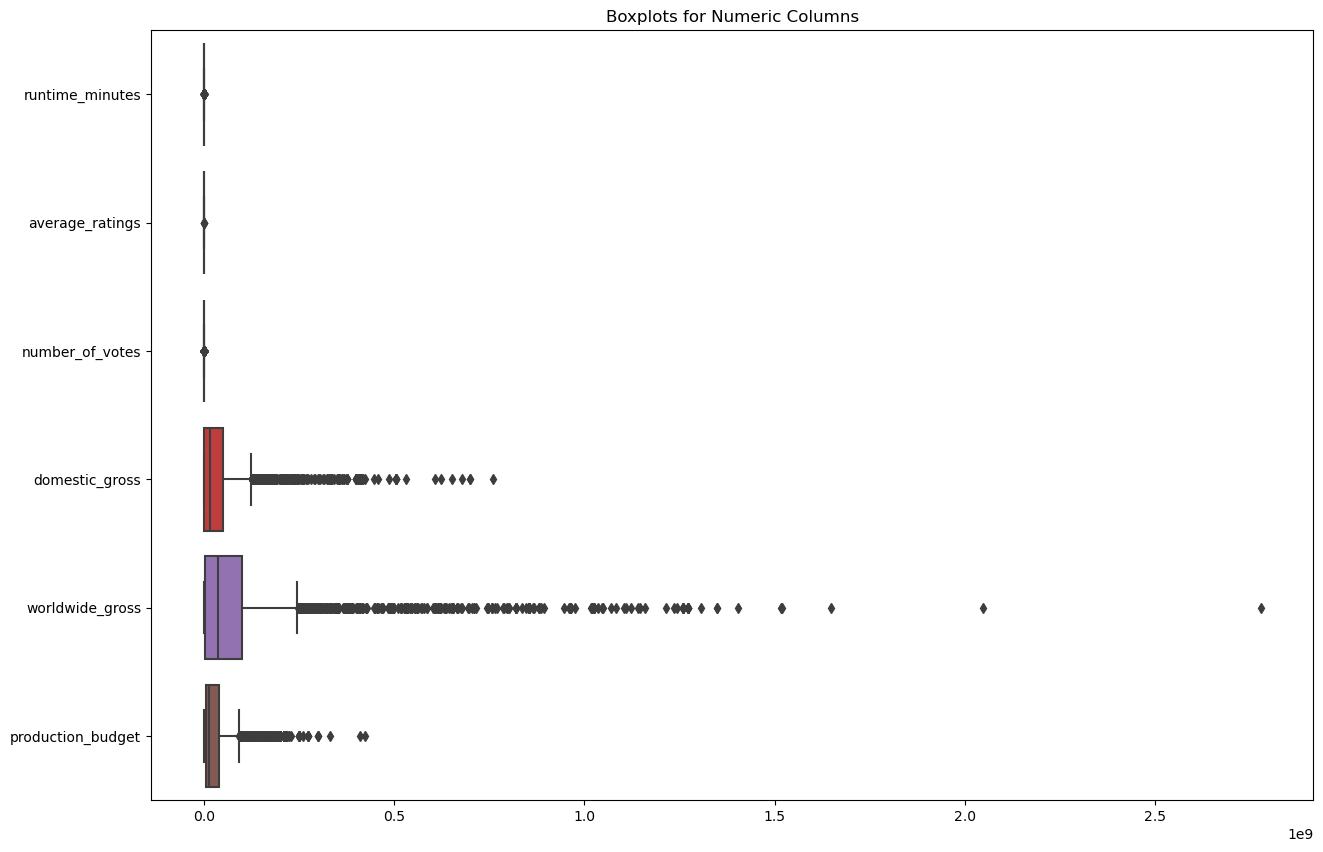

In [35]:
#import libraries
import matplotlib.pyplot as plt
import seaborn as sns
#select numerical columns
numeric_columns=combined[['runtime_minutes','average_ratings','number_of_votes','domestic_gross','worldwide_gross','production_budget']] 
# Plot boxplots for all numeric columns
plt.figure(figsize=(15, 10))
sns.boxplot(data=numeric_columns, orient='h')
plt.title("Boxplots for Numeric Columns")
plt.show()

there's plenty of outliers in domestic_gross,production_budget and worldwide_gross but we decided to keep them since they are sensitive columns

### Feature engineering
this involes making of new columns or transforming existing features

#### total gross

In [36]:
#creating new features
combined['Total_gross']=(combined['domestic_gross']+combined['worldwide_gross'])
combined.head()

,runtime_minutes,genres,average_ratings,number_of_votes,release_date,title,production_budget,domestic_gross,worldwide_gross,Total_gross
0,91,"Action,Animation,Comedy",1,8248,2013-05-07,Foodfight!,45000000,0,73706,73706
1,88,Unkown,7,24,2015-06-19,The Overnight,200000,1109808,1165996,2275804
2,79,"Comedy,Mystery",6,14828,2015-06-19,The Overnight,200000,1109808,1165996,2275804
3,124,"Adventure,Drama,Romance",6,37886,2012-12-21,On the Road,25000000,720828,9313302,10034130
4,89,Drama,6,6,2012-12-21,On the Road,25000000,720828,9313302,10034130


#### ROI
Return on Investment (ROI) is a financial metric used to evaluate the profitability or performance of an investment relative to its cost. 

It is often expressed as a percentage and helps investors and businesses assess the efficiency and potential return of an investment.

Return on Investment (ROI):(gross−Budget)/Budget

In [37]:
#creating new features
combined['ROI']=((combined['Total_gross']-combined['production_budget'])/combined['production_budget'])*100
combined.head()

,runtime_minutes,genres,average_ratings,number_of_votes,release_date,title,production_budget,domestic_gross,worldwide_gross,Total_gross,ROI
0,91,"Action,Animation,Comedy",1,8248,2013-05-07,Foodfight!,45000000,0,73706,73706,-99.836209
1,88,Unkown,7,24,2015-06-19,The Overnight,200000,1109808,1165996,2275804,1037.902000
2,79,"Comedy,Mystery",6,14828,2015-06-19,The Overnight,200000,1109808,1165996,2275804,1037.902000
3,124,"Adventure,Drama,Romance",6,37886,2012-12-21,On the Road,25000000,720828,9313302,10034130,-59.863480
4,89,Drama,6,6,2012-12-21,On the Road,25000000,720828,9313302,10034130,-59.863480


#### seasons column

In [38]:
# Extract 'Year' from the 'Date' column
combined['month'] = combined['release_date'].dt.month

#create a function to categorize the months in seasons 
def categorize_seasons(month):
    
    if month in [12, 1, 2]:
        return 'Winter'
    
    elif month in [3, 4, 5]:
        return 'Spring'
    
    elif month in [6, 7, 8]:
        return 'Summer'
    
    elif month in [9, 10, 11]:
        return 'Fall'
#apply the categorize_seasons function    
combined['season'] = combined['month'].apply(categorize_seasons)
#view the dataset
combined.head()

,runtime_minutes,genres,average_ratings,number_of_votes,release_date,title,production_budget,domestic_gross,worldwide_gross,Total_gross,ROI,month,season
0,91,"Action,Animation,Comedy",1,8248,2013-05-07,Foodfight!,45000000,0,73706,73706,-99.836209,5,Spring
1,88,Unkown,7,24,2015-06-19,The Overnight,200000,1109808,1165996,2275804,1037.902000,6,Summer
2,79,"Comedy,Mystery",6,14828,2015-06-19,The Overnight,200000,1109808,1165996,2275804,1037.902000,6,Summer
3,124,"Adventure,Drama,Romance",6,37886,2012-12-21,On the Road,25000000,720828,9313302,10034130,-59.863480,12,Winter
4,89,Drama,6,6,2012-12-21,On the Road,25000000,720828,9313302,10034130,-59.863480,12,Winter


#### movie ratings

In [39]:
#create a movie_ratings function
def movie_ratings(value):
    if value <= 4:
        return 'low'
    
    elif 5 <= value <= 7:
        return 'Average' 
    
    else:
        return 'High'
#apply the function    
combined['movie_rating'] = combined['average_ratings'].apply(movie_ratings)  
#view the dataset
combined.head()

,runtime_minutes,genres,average_ratings,number_of_votes,release_date,title,production_budget,domestic_gross,worldwide_gross,Total_gross,ROI,month,season,movie_rating
0,91,"Action,Animation,Comedy",1,8248,2013-05-07,Foodfight!,45000000,0,73706,73706,-99.836209,5,Spring,low
1,88,Unkown,7,24,2015-06-19,The Overnight,200000,1109808,1165996,2275804,1037.902000,6,Summer,Average
2,79,"Comedy,Mystery",6,14828,2015-06-19,The Overnight,200000,1109808,1165996,2275804,1037.902000,6,Summer,Average
3,124,"Adventure,Drama,Romance",6,37886,2012-12-21,On the Road,25000000,720828,9313302,10034130,-59.863480,12,Winter,Average
4,89,Drama,6,6,2012-12-21,On the Road,25000000,720828,9313302,10034130,-59.863480,12,Winter,Average


#### movie_length

In [40]:
#create a movie duration function to classify the duration
def movie_duration(value):
    if value <= 60:
        return 'Short'
    
    elif 60 <= value <= 120:
        return 'Medium' 
    
    else:
        return 'Long'
#apply the function    
combined['movie_length'] = combined['runtime_minutes'].apply(movie_duration)  
#view the dataset
combined.head()

,runtime_minutes,genres,average_ratings,number_of_votes,release_date,title,production_budget,domestic_gross,worldwide_gross,Total_gross,ROI,month,season,movie_rating,movie_length
0,91,"Action,Animation,Comedy",1,8248,2013-05-07,Foodfight!,45000000,0,73706,73706,-99.836209,5,Spring,low,Medium
1,88,Unkown,7,24,2015-06-19,The Overnight,200000,1109808,1165996,2275804,1037.902000,6,Summer,Average,Medium
2,79,"Comedy,Mystery",6,14828,2015-06-19,The Overnight,200000,1109808,1165996,2275804,1037.902000,6,Summer,Average,Medium
3,124,"Adventure,Drama,Romance",6,37886,2012-12-21,On the Road,25000000,720828,9313302,10034130,-59.863480,12,Winter,Average,Long
4,89,Drama,6,6,2012-12-21,On the Road,25000000,720828,9313302,10034130,-59.863480,12,Winter,Average,Medium


#### splitting the genre column 

In [41]:
# Split the 'genres' column into a list but keep the original column
combined['genres_list'] = combined['genres'].str.split(',')  

# Expand the 'genres_list' into separate columns
genres_expanded = combined['genres_list'].apply(pd.Series)  
genres_expanded = genres_expanded.rename(columns=lambda x: f'genre_{x+1}')  # Rename the columns

# Concatenate the new columns with the original DataFrame
combined = pd.concat([combined, genres_expanded], axis=1)

In [42]:
#viewing the dataset
combined.head()

,runtime_minutes,genres,average_ratings,number_of_votes,release_date,title,production_budget,domestic_gross,worldwide_gross,Total_gross,ROI,month,season,movie_rating,movie_length,genres_list,genre_1,genre_2,genre_3
0,91,"Action,Animation,Comedy",1,8248,2013-05-07,Foodfight!,45000000,0,73706,73706,-99.836209,5,Spring,low,Medium,"[Action, Animation, Comedy]",Action,Animation,Comedy
1,88,Unkown,7,24,2015-06-19,The Overnight,200000,1109808,1165996,2275804,1037.902000,6,Summer,Average,Medium,[Unkown],Unkown,NaN,NaN
2,79,"Comedy,Mystery",6,14828,2015-06-19,The Overnight,200000,1109808,1165996,2275804,1037.902000,6,Summer,Average,Medium,"[Comedy, Mystery]",Comedy,Mystery,NaN
3,124,"Adventure,Drama,Romance",6,37886,2012-12-21,On the Road,25000000,720828,9313302,10034130,-59.863480,12,Winter,Average,Long,"[Adventure, Drama, Romance]",Adventure,Drama,Romance
4,89,Drama,6,6,2012-12-21,On the Road,25000000,720828,9313302,10034130,-59.863480,12,Winter,Average,Medium,[Drama],Drama,NaN,NaN


In [43]:
#dropping irrelevant columns
combined = combined.drop(columns=['genre_2', 'genre_3','genres_list'], errors='ignore')
combined.head()

,runtime_minutes,genres,average_ratings,number_of_votes,release_date,title,production_budget,domestic_gross,worldwide_gross,Total_gross,ROI,month,season,movie_rating,movie_length,genre_1
0,91,"Action,Animation,Comedy",1,8248,2013-05-07,Foodfight!,45000000,0,73706,73706,-99.836209,5,Spring,low,Medium,Action
1,88,Unkown,7,24,2015-06-19,The Overnight,200000,1109808,1165996,2275804,1037.902000,6,Summer,Average,Medium,Unkown
2,79,"Comedy,Mystery",6,14828,2015-06-19,The Overnight,200000,1109808,1165996,2275804,1037.902000,6,Summer,Average,Medium,Comedy
3,124,"Adventure,Drama,Romance",6,37886,2012-12-21,On the Road,25000000,720828,9313302,10034130,-59.863480,12,Winter,Average,Long,Adventure
4,89,Drama,6,6,2012-12-21,On the Road,25000000,720828,9313302,10034130,-59.863480,12,Winter,Average,Medium,Drama


In [44]:
#Create a new column for processing
combined['genre_processed'] = combined['genres'].str.split(',')

# Apply transformations according to the specifications
def process_genres(genre_list):
    if len(genre_list) == 1:
        return genre_list[0]  # Leave single genre as it is
    elif len(genre_list) == 2:
        return f"{genre_list[0]} & {genre_list[1]}"  # Replace comma with '&'
    else:
        return f"{genre_list[0]} & {genre_list[1]}"  # Keep only the first two, use '&'

# Apply the function to 'genre_processed' and store the result in a new column
combined['genre_combined'] = combined['genre_processed'].apply(process_genres)

# Check the result
combined[['genres', 'genre_combined']]

,genres,genre_combined
0,"Action,Animation,Comedy",Action & Animation
1,Unkown,Unkown
2,"Comedy,Mystery",Comedy & Mystery
3,"Adventure,Drama,Romance",Adventure & Drama
4,Drama,Drama
...,...,...
3355,Documentary,Documentary
3357,"Drama,Horror,Mystery",Drama & Horror
3358,"Action,Adventure,Animation",Action & Adventure
3359,"Action,Comedy,Crime",Action & Comedy


In [45]:
#view the dataset
combined.head()

,runtime_minutes,genres,average_ratings,number_of_votes,release_date,title,production_budget,domestic_gross,worldwide_gross,Total_gross,ROI,month,season,movie_rating,movie_length,genre_1,genre_processed,genre_combined
0,91,"Action,Animation,Comedy",1,8248,2013-05-07,Foodfight!,45000000,0,73706,73706,-99.836209,5,Spring,low,Medium,Action,"[Action, Animation, Comedy]",Action & Animation
1,88,Unkown,7,24,2015-06-19,The Overnight,200000,1109808,1165996,2275804,1037.902000,6,Summer,Average,Medium,Unkown,[Unkown],Unkown
2,79,"Comedy,Mystery",6,14828,2015-06-19,The Overnight,200000,1109808,1165996,2275804,1037.902000,6,Summer,Average,Medium,Comedy,"[Comedy, Mystery]",Comedy & Mystery
3,124,"Adventure,Drama,Romance",6,37886,2012-12-21,On the Road,25000000,720828,9313302,10034130,-59.863480,12,Winter,Average,Long,Adventure,"[Adventure, Drama, Romance]",Adventure & Drama
4,89,Drama,6,6,2012-12-21,On the Road,25000000,720828,9313302,10034130,-59.863480,12,Winter,Average,Medium,Drama,[Drama],Drama


In [46]:
#drop irrelevant columns
combined = combined.drop(columns=['genre_processed'], errors='ignore')
#view the dataset
combined.head()

,runtime_minutes,genres,average_ratings,number_of_votes,release_date,title,production_budget,domestic_gross,worldwide_gross,Total_gross,ROI,month,season,movie_rating,movie_length,genre_1,genre_combined
0,91,"Action,Animation,Comedy",1,8248,2013-05-07,Foodfight!,45000000,0,73706,73706,-99.836209,5,Spring,low,Medium,Action,Action & Animation
1,88,Unkown,7,24,2015-06-19,The Overnight,200000,1109808,1165996,2275804,1037.902000,6,Summer,Average,Medium,Unkown,Unkown
2,79,"Comedy,Mystery",6,14828,2015-06-19,The Overnight,200000,1109808,1165996,2275804,1037.902000,6,Summer,Average,Medium,Comedy,Comedy & Mystery
3,124,"Adventure,Drama,Romance",6,37886,2012-12-21,On the Road,25000000,720828,9313302,10034130,-59.863480,12,Winter,Average,Long,Adventure,Adventure & Drama
4,89,Drama,6,6,2012-12-21,On the Road,25000000,720828,9313302,10034130,-59.863480,12,Winter,Average,Medium,Drama,Drama


In [47]:
#check for missing values
combined.isna().sum()

runtime_minutes      0
genres               0
average_ratings      0
number_of_votes      0
release_date         0
title                0
production_budget    0
domestic_gross       0
worldwide_gross      0
Total_gross          0
ROI                  0
month                0
season               0
movie_rating         0
movie_length         0
genre_1              0
genre_combined       0
dtype: int64

#### budget category

In [48]:
# Categorize budgets
def categorize_budget(budget):
    if budget < 20_000_000:  # Low budget
        return 'Low'
    elif 20_000_000 <= budget <= 80_000_000:  # Medium budget
        return 'Medium'
    else:  # High budget
        return 'High'
#apply the function
combined['Budget_Category'] = combined['production_budget'].apply(categorize_budget)
#view the dataset
combined.head()

,runtime_minutes,genres,average_ratings,number_of_votes,release_date,title,production_budget,domestic_gross,worldwide_gross,Total_gross,ROI,month,season,movie_rating,movie_length,genre_1,genre_combined,Budget_Category
0,91,"Action,Animation,Comedy",1,8248,2013-05-07,Foodfight!,45000000,0,73706,73706,-99.836209,5,Spring,low,Medium,Action,Action & Animation,Medium
1,88,Unkown,7,24,2015-06-19,The Overnight,200000,1109808,1165996,2275804,1037.902000,6,Summer,Average,Medium,Unkown,Unkown,Low
2,79,"Comedy,Mystery",6,14828,2015-06-19,The Overnight,200000,1109808,1165996,2275804,1037.902000,6,Summer,Average,Medium,Comedy,Comedy & Mystery,Low
3,124,"Adventure,Drama,Romance",6,37886,2012-12-21,On the Road,25000000,720828,9313302,10034130,-59.863480,12,Winter,Average,Long,Adventure,Adventure & Drama,Medium
4,89,Drama,6,6,2012-12-21,On the Road,25000000,720828,9313302,10034130,-59.863480,12,Winter,Average,Medium,Drama,Drama,Medium


#### break even point
The break-even point in movie production refers to the minimum box office revenue a film needs to generate to cover its production costs, meaning no profit and no loss.

The break-even point is when Box Office Revenue >= Production Budget.

In [49]:
# Create a break-even indicator
combined["Break_Even"] = combined["Total_gross"] >= combined["production_budget"]
#view the dataset
combined.head()

,runtime_minutes,genres,average_ratings,number_of_votes,release_date,title,production_budget,domestic_gross,worldwide_gross,Total_gross,ROI,month,season,movie_rating,movie_length,genre_1,genre_combined,Budget_Category,Break_Even
0,91,"Action,Animation,Comedy",1,8248,2013-05-07,Foodfight!,45000000,0,73706,73706,-99.836209,5,Spring,low,Medium,Action,Action & Animation,Medium,False
1,88,Unkown,7,24,2015-06-19,The Overnight,200000,1109808,1165996,2275804,1037.902000,6,Summer,Average,Medium,Unkown,Unkown,Low,True
2,79,"Comedy,Mystery",6,14828,2015-06-19,The Overnight,200000,1109808,1165996,2275804,1037.902000,6,Summer,Average,Medium,Comedy,Comedy & Mystery,Low,True
3,124,"Adventure,Drama,Romance",6,37886,2012-12-21,On the Road,25000000,720828,9313302,10034130,-59.863480,12,Winter,Average,Long,Adventure,Adventure & Drama,Medium,False
4,89,Drama,6,6,2012-12-21,On the Road,25000000,720828,9313302,10034130,-59.863480,12,Winter,Average,Medium,Drama,Drama,Medium,False


#### profit margin

In [50]:
# Calculate Profit Margin
combined['Profit_Margin'] = (combined['Total_gross'] - combined['production_budget']) / combined['Total_gross']
#view the dataset
combined.head()

,runtime_minutes,genres,average_ratings,number_of_votes,release_date,title,production_budget,domestic_gross,worldwide_gross,Total_gross,ROI,month,season,movie_rating,movie_length,genre_1,genre_combined,Budget_Category,Break_Even,Profit_Margin
0,91,"Action,Animation,Comedy",1,8248,2013-05-07,Foodfight!,45000000,0,73706,73706,-99.836209,5,Spring,low,Medium,Action,Action & Animation,Medium,False,-609.533742
1,88,Unkown,7,24,2015-06-19,The Overnight,200000,1109808,1165996,2275804,1037.902000,6,Summer,Average,Medium,Unkown,Unkown,Low,True,0.912119
2,79,"Comedy,Mystery",6,14828,2015-06-19,The Overnight,200000,1109808,1165996,2275804,1037.902000,6,Summer,Average,Medium,Comedy,Comedy & Mystery,Low,True,0.912119
3,124,"Adventure,Drama,Romance",6,37886,2012-12-21,On the Road,25000000,720828,9313302,10034130,-59.863480,12,Winter,Average,Long,Adventure,Adventure & Drama,Medium,False,-1.491497
4,89,Drama,6,6,2012-12-21,On the Road,25000000,720828,9313302,10034130,-59.863480,12,Winter,Average,Medium,Drama,Drama,Medium,False,-1.491497


#### quarter and monthly 

In [51]:
# Extract quarter from release_date_x
combined['quarter'] =combined['release_date'].dt.to_period('Q')

#view the dataset
combined.head()

,runtime_minutes,genres,average_ratings,number_of_votes,release_date,title,production_budget,domestic_gross,worldwide_gross,Total_gross,...,month,season,movie_rating,movie_length,genre_1,genre_combined,Budget_Category,Break_Even,Profit_Margin,quarter
0,91,"Action,Animation,Comedy",1,8248,2013-05-07,Foodfight!,45000000,0,73706,73706,...,5,Spring,low,Medium,Action,Action & Animation,Medium,False,-609.533742,2013Q2
1,88,Unkown,7,24,2015-06-19,The Overnight,200000,1109808,1165996,2275804,...,6,Summer,Average,Medium,Unkown,Unkown,Low,True,0.912119,2015Q2
2,79,"Comedy,Mystery",6,14828,2015-06-19,The Overnight,200000,1109808,1165996,2275804,...,6,Summer,Average,Medium,Comedy,Comedy & Mystery,Low,True,0.912119,2015Q2
3,124,"Adventure,Drama,Romance",6,37886,2012-12-21,On the Road,25000000,720828,9313302,10034130,...,12,Winter,Average,Long,Adventure,Adventure & Drama,Medium,False,-1.491497,2012Q4
4,89,Drama,6,6,2012-12-21,On the Road,25000000,720828,9313302,10034130,...,12,Winter,Average,Medium,Drama,Drama,Medium,False,-1.491497,2012Q4


#### year

In [52]:
# Extract year, month, and quarter from release_date_x
combined['year'] =combined['release_date'].dt.year
#view the dataset
combined.head()

,runtime_minutes,genres,average_ratings,number_of_votes,release_date,title,production_budget,domestic_gross,worldwide_gross,Total_gross,...,season,movie_rating,movie_length,genre_1,genre_combined,Budget_Category,Break_Even,Profit_Margin,quarter,year
0,91,"Action,Animation,Comedy",1,8248,2013-05-07,Foodfight!,45000000,0,73706,73706,...,Spring,low,Medium,Action,Action & Animation,Medium,False,-609.533742,2013Q2,2013
1,88,Unkown,7,24,2015-06-19,The Overnight,200000,1109808,1165996,2275804,...,Summer,Average,Medium,Unkown,Unkown,Low,True,0.912119,2015Q2,2015
2,79,"Comedy,Mystery",6,14828,2015-06-19,The Overnight,200000,1109808,1165996,2275804,...,Summer,Average,Medium,Comedy,Comedy & Mystery,Low,True,0.912119,2015Q2,2015
3,124,"Adventure,Drama,Romance",6,37886,2012-12-21,On the Road,25000000,720828,9313302,10034130,...,Winter,Average,Long,Adventure,Adventure & Drama,Medium,False,-1.491497,2012Q4,2012
4,89,Drama,6,6,2012-12-21,On the Road,25000000,720828,9313302,10034130,...,Winter,Average,Medium,Drama,Drama,Medium,False,-1.491497,2012Q4,2012


#### peak season

In [53]:
# Define peak season (Summer & Holiday)
combined['peak_season'] = combined['month'].apply(lambda x: 'Peak' if x in [6, 7, 11, 12] else 'Non-Peak')
#view dataset
combined.head()

,runtime_minutes,genres,average_ratings,number_of_votes,release_date,title,production_budget,domestic_gross,worldwide_gross,Total_gross,...,movie_rating,movie_length,genre_1,genre_combined,Budget_Category,Break_Even,Profit_Margin,quarter,year,peak_season
0,91,"Action,Animation,Comedy",1,8248,2013-05-07,Foodfight!,45000000,0,73706,73706,...,low,Medium,Action,Action & Animation,Medium,False,-609.533742,2013Q2,2013,Non-Peak
1,88,Unkown,7,24,2015-06-19,The Overnight,200000,1109808,1165996,2275804,...,Average,Medium,Unkown,Unkown,Low,True,0.912119,2015Q2,2015,Peak
2,79,"Comedy,Mystery",6,14828,2015-06-19,The Overnight,200000,1109808,1165996,2275804,...,Average,Medium,Comedy,Comedy & Mystery,Low,True,0.912119,2015Q2,2015,Peak
3,124,"Adventure,Drama,Romance",6,37886,2012-12-21,On the Road,25000000,720828,9313302,10034130,...,Average,Long,Adventure,Adventure & Drama,Medium,False,-1.491497,2012Q4,2012,Peak
4,89,Drama,6,6,2012-12-21,On the Road,25000000,720828,9313302,10034130,...,Average,Medium,Drama,Drama,Medium,False,-1.491497,2012Q4,2012,Peak


### final checks
we review the data to ensure the cleaning steps have been applied correctly

In [54]:
#view the dataset
combined.head()

,runtime_minutes,genres,average_ratings,number_of_votes,release_date,title,production_budget,domestic_gross,worldwide_gross,Total_gross,...,movie_rating,movie_length,genre_1,genre_combined,Budget_Category,Break_Even,Profit_Margin,quarter,year,peak_season
0,91,"Action,Animation,Comedy",1,8248,2013-05-07,Foodfight!,45000000,0,73706,73706,...,low,Medium,Action,Action & Animation,Medium,False,-609.533742,2013Q2,2013,Non-Peak
1,88,Unkown,7,24,2015-06-19,The Overnight,200000,1109808,1165996,2275804,...,Average,Medium,Unkown,Unkown,Low,True,0.912119,2015Q2,2015,Peak
2,79,"Comedy,Mystery",6,14828,2015-06-19,The Overnight,200000,1109808,1165996,2275804,...,Average,Medium,Comedy,Comedy & Mystery,Low,True,0.912119,2015Q2,2015,Peak
3,124,"Adventure,Drama,Romance",6,37886,2012-12-21,On the Road,25000000,720828,9313302,10034130,...,Average,Long,Adventure,Adventure & Drama,Medium,False,-1.491497,2012Q4,2012,Peak
4,89,Drama,6,6,2012-12-21,On the Road,25000000,720828,9313302,10034130,...,Average,Medium,Drama,Drama,Medium,False,-1.491497,2012Q4,2012,Peak


In [55]:
#check dataset info
combined.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3149 entries, 0 to 3360
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   runtime_minutes    3149 non-null   int64         
 1   genres             3149 non-null   object        
 2   average_ratings    3149 non-null   int64         
 3   number_of_votes    3149 non-null   int64         
 4   release_date       3149 non-null   datetime64[ns]
 5   title              3149 non-null   object        
 6   production_budget  3149 non-null   int64         
 7   domestic_gross     3149 non-null   int64         
 8   worldwide_gross    3149 non-null   int64         
 9   Total_gross        3149 non-null   int64         
 10  ROI                3149 non-null   float64       
 11  month              3149 non-null   int32         
 12  season             3149 non-null   object        
 13  movie_rating       3149 non-null   object        
 14  movie_length 

In [56]:
#reset index
combined.reset_index(drop=True, inplace=True)

In [57]:
#review the dataset info
combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3149 entries, 0 to 3148
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   runtime_minutes    3149 non-null   int64         
 1   genres             3149 non-null   object        
 2   average_ratings    3149 non-null   int64         
 3   number_of_votes    3149 non-null   int64         
 4   release_date       3149 non-null   datetime64[ns]
 5   title              3149 non-null   object        
 6   production_budget  3149 non-null   int64         
 7   domestic_gross     3149 non-null   int64         
 8   worldwide_gross    3149 non-null   int64         
 9   Total_gross        3149 non-null   int64         
 10  ROI                3149 non-null   float64       
 11  month              3149 non-null   int32         
 12  season             3149 non-null   object        
 13  movie_rating       3149 non-null   object        
 14  movie_le

In [58]:
# Save the DataFrame to a CSV file
combined.to_csv('combined_cleaned_dataset.csv', index=False)

# EXPLORATORY DATA ANALYSIS
Here we would do visualization based on our previous business questions and get recomendations

## What genre and themes consistently leads to box office success?

### Univariate Analysis

#### Identify Top-Performing Genres by Total Gross Revenue
We will group by genres and analyze the total earnings.

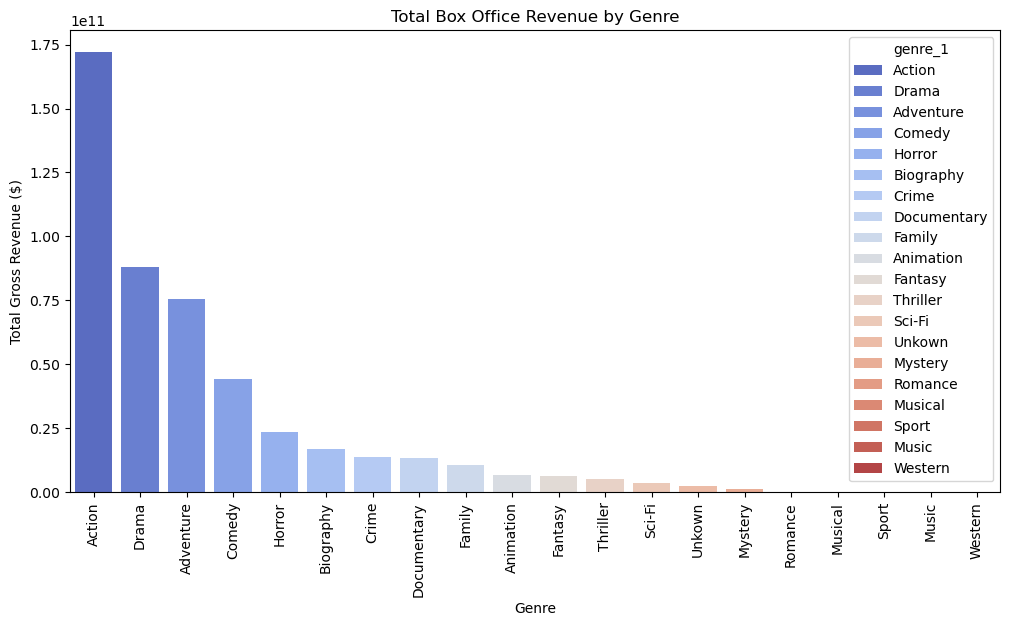

NameError: name 'ax' is not defined

In [62]:
# Group by genre and calculate total revenue
genre_revenue = combined.groupby("genre_1")["Total_gross"].sum().sort_values(ascending=False)

# Plot
# Plot with updated parameters
plt.figure(figsize=(12, 6))
sns.barplot(
    x=genre_revenue.index,
    y=genre_revenue.values,
    hue=genre_revenue.index,  # Assign x variable to hue
    palette="coolwarm",
    dodge=False,
    # legend=False  # Remove legend
)
plt.xticks(rotation=90)
plt.title("Total Box Office Revenue by Genre")
plt.xlabel("Genre")
plt.ylabel("Total Gross Revenue ($)")
plt.show()
ax.legend()


✅ Insight: Genres with the highest total revenue indicate which are the most financially successful.for our case that is action,drama and adventure

####  Which Genres Have the Highest ROI?
Some genres may have high revenue but also high production costs. To measure profitability, we analyze ROI.

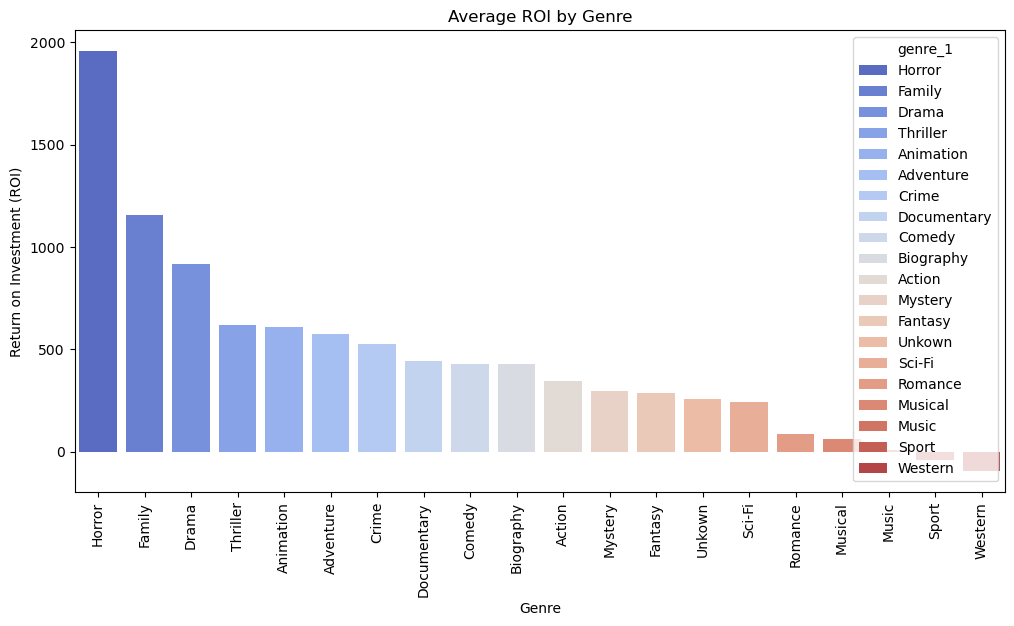

NameError: name 'ax' is not defined

In [65]:
# Group by genre and calculate average ROI
genre_roi = combined.groupby("genre_1")["ROI"].mean().sort_values(ascending=False)

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(
    x=genre_roi.index,
    y=genre_roi.values,
    hue=genre_roi.index,  # Assign x to hue for palette compatibility
    palette="coolwarm",
    dodge=False,
  # Suppress redundant legend
)
plt.xticks(rotation=90)
plt.title("Average ROI by Genre")
plt.xlabel("Genre")
plt.ylabel("Return on Investment (ROI)")
plt.show()
ax.legend()

✅ Insight: Genres with the highest ROI are the most profitable, even if their revenue isn’t the highest. in this case that is horror and family

#### Audience Ratings by Genre
High audience ratings indicate genre satisfaction.

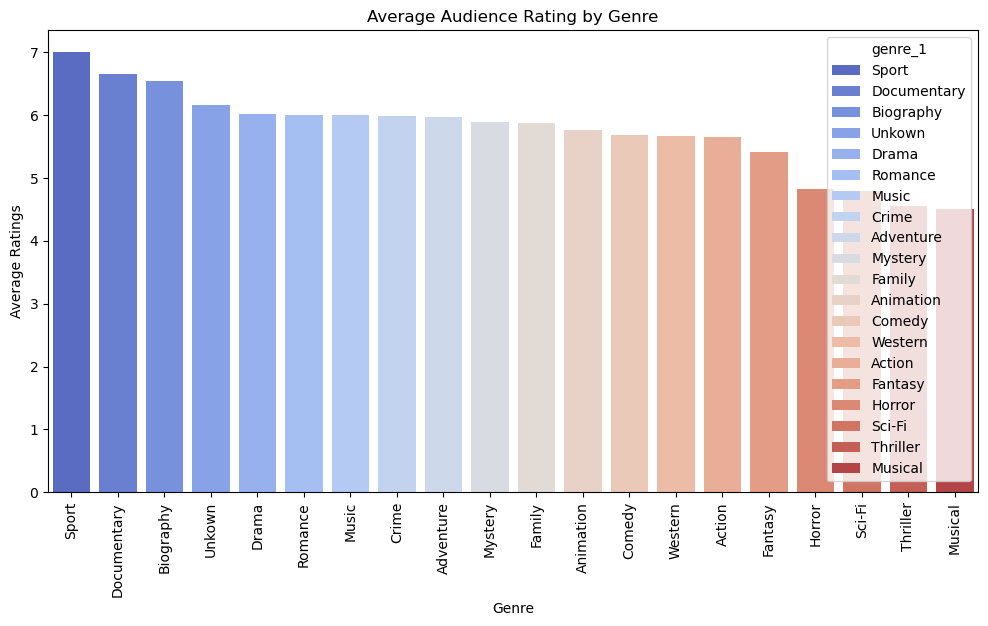

NameError: name 'ax' is not defined

In [67]:
# Group by genre and calculate average rating
genre_ratings = combined.groupby("genre_1")["average_ratings"].mean().sort_values(ascending=False)

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(
    x=genre_ratings.index,
    y=genre_ratings.values,
    hue=genre_ratings.index,  # Explicitly associate palette with hue
    palette="coolwarm",
    dodge=False,
     # Suppress legend
)
plt.xticks(rotation=90)
plt.title("Average Audience Rating by Genre")
plt.xlabel("Genre")
plt.ylabel("Average Ratings")
plt.show()
ax.legend()


✅ Insight: This tells us which genres are most appreciated by audiences, not just financially successful.

#### Audience Engagement: Number of Votes by Genre
A highly rated genre with few votes might not be popular.

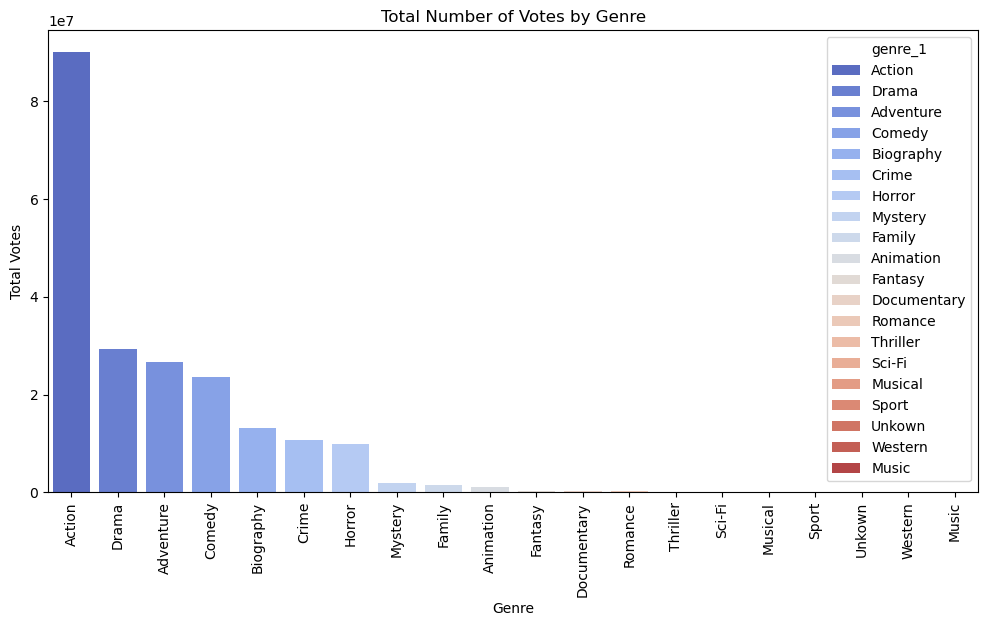

NameError: name 'ax' is not defined

In [69]:
# Group by genre and count total votes
genre_votes = combined.groupby("genre_1")["number_of_votes"].sum().sort_values(ascending=False)

#plot
plt.figure(figsize=(12, 6))
sns.barplot(
    x=genre_votes.index,
    y=genre_votes.values,
    hue=genre_votes.index,  # Explicitly associate palette with hue
    palette="coolwarm",
    dodge=False,
    #legend=False
)
plt.xticks(rotation=90)
plt.title("Total Number of Votes by Genre")
plt.xlabel("Genre")
plt.ylabel("Total Votes")
plt.show()
ax.legend()

✅ Insight: Genres with high votes indicate high audience engagement and demand. for our case that would be action

#### Best Release Season for  Success
Does seasonality impact success?

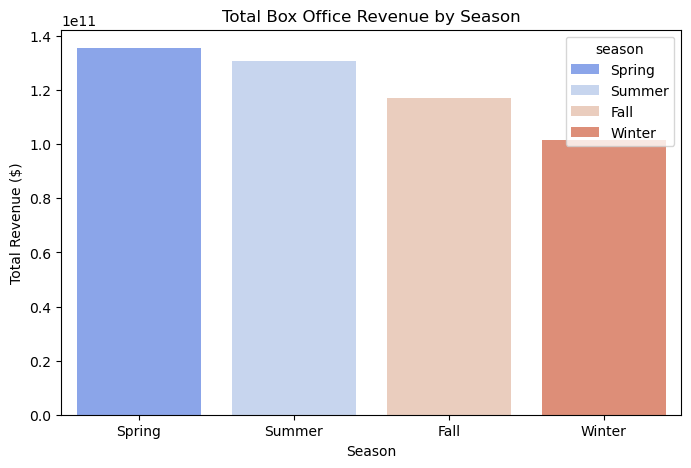

In [70]:
# Group by season and sum total revenue
season_revenue = combined.groupby("season")["Total_gross"].sum().sort_values(ascending=False)

# plot
plt.figure(figsize=(8, 5))
sns.barplot(
    x=season_revenue.index,
    y=season_revenue.values,
    hue=season_revenue.index,  # Explicitly associate palette with hue
    palette="coolwarm",
    dodge=False,
    #legend=False
)
plt.title("Total Box Office Revenue by Season")
plt.xlabel("Season")
plt.ylabel("Total Revenue ($)")
plt.show()


✅ Insight: Determines whether summer blockbusters or holiday releases perform better. and according to our data summer is better

#### Does Movie Length Affect Box Office Success?
Are longer movies more successful?

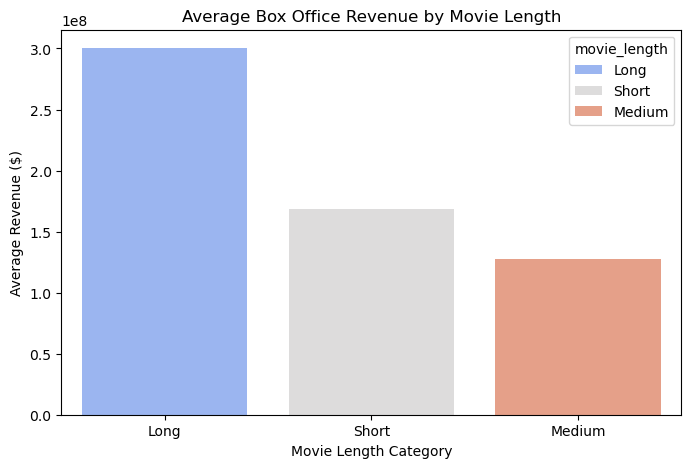

In [71]:
# Group by movie length category and sum revenue
length_revenue = combined.groupby("movie_length")["Total_gross"].mean().sort_values(ascending=False)

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(
    x=length_revenue.index,
    y=length_revenue.values,
    hue=length_revenue.index,  # Explicitly associate palette with hue
    palette="coolwarm",
    dodge=False,
    #legend=False
)
plt.title("Average Box Office Revenue by Movie Length")
plt.xlabel("Movie Length Category")
plt.ylabel("Average Revenue ($)")
plt.show()


✅ Insight: Does a longer runtime correlate with box office success? yes

####  ANALYZE AVERAGE BUDGET OF MOVIES

Most movies have production budgets below $40 million with a  small number of high-budget movies exceed 200 million usd, indicating big-budget blockbusters.

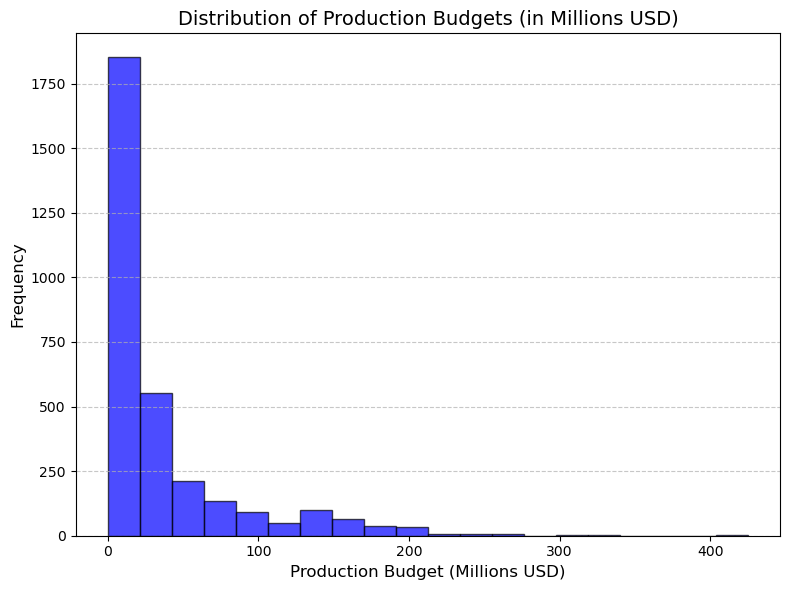

(35052331.44204509,
 count    3.149000e+03
 mean     3.505233e+07
 std      4.899110e+07
 min      9.000000e+03
 25%      5.000000e+06
 50%      1.500000e+07
 75%      4.000000e+07
 max      4.250000e+08
 Name: production_budget, dtype: float64)

In [72]:
# Calculate the average production budget
average_budget = combined['production_budget'].mean()

# Generate descriptive statistics for the production budget
budget_stats = combined['production_budget'].describe()

# Visualize the distribution of production budgets
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.hist(combined['production_budget'] / 1e6, bins=20, edgecolor='black', color='blue', alpha=0.7)
plt.title('Distribution of Production Budgets (in Millions USD)', fontsize=14)
plt.xlabel('Production Budget (Millions USD)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Display average budget and statistics
average_budget, budget_stats

### Multivariate analysis

####  ANALYZE GENRES BY TOTAL GROSS REVENUE AND ROI
Adventure, Action, and Drama dominate in total gross revenue while Horror leads in ROI,Animation and Fantasy strike a balance, achieving both strong total gross and high ROI.

In [74]:
# Calculate total and average gross revenue and ROI by genre
genre_performance = combined.groupby('genre_1').agg(
    total_gross=('Total_gross', 'sum'),
    avg_gross=('Total_gross', 'mean'),
    avg_ROI=('ROI', 'mean')
).sort_values(by='total_gross', ascending=False)

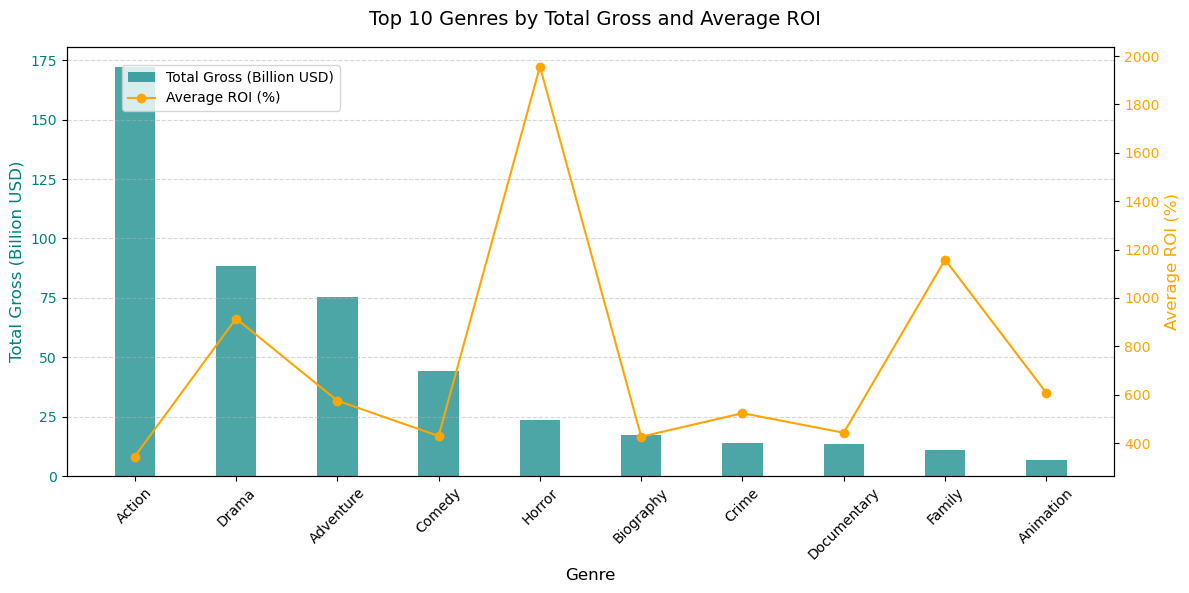

In [75]:
# Combine Total Gross and ROI into a single visualization for top-performing genres
fig, ax1 = plt.subplots(figsize=(12, 6))

# Bar graph for Total Gross Revenue
bar_width = 0.4
x = range(len(genre_performance.head(10)))

ax1.bar(
    x, 
    genre_performance['total_gross'].head(10) / 1e9,  # Convert to billions for readability
    width=bar_width, 
    label='Total Gross (Billion USD)', 
    color='teal', 
    alpha=0.7
)
ax1.set_xlabel('Genre', fontsize=12)
ax1.set_ylabel('Total Gross (Billion USD)', fontsize=12, color='teal')
ax1.tick_params(axis='y', labelcolor='teal')
ax1.set_xticks(x)
ax1.set_xticklabels(genre_performance.head(10).index, rotation=45, fontsize=10)
ax1.grid(axis='y', linestyle='--', alpha=0.5)

# Add secondary axis for ROI
ax2 = ax1.twinx()
ax2.plot(
    x, 
    genre_performance['avg_ROI'].head(10), 
    color='orange', 
    marker='o', 
    label='Average ROI (%)'
)
ax2.set_ylabel('Average ROI (%)', fontsize=12, color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

# Add legends and title
fig.suptitle('Top 10 Genres by Total Gross and Average ROI', fontsize=14)
fig.legend(loc='upper left', bbox_to_anchor=(0.1, 0.9), fontsize=10)
plt.tight_layout()
plt.show()

**1. Budget Recommendation**

Focus on production budgets between 10 million usd  and 40 million usd , aligning with the 25th to 75th percentile, to capture consistent ROI opportunities while occasionally considering high-budget films ($100M+) to capitalize on blockbuster trends, but prioritize efficient mid-budget films for stability

**2. Genre's Recommendation** 

Focus on producing high-revenue films in Adventure, Action, and Drama genres to target global audiences, incorporating occasional high-budget blockbusters for significant market impact, while leveraging Horror and Animation genres for low-risk, high-ROI projects to ensure a balanced and profitable portfolio.



**Final Answer**

By analyzing these metrics, we can determine:

 * Which genres consistently generate the most revenue.(horror and family)
 * Which genres are the most profitable (ROI).(action
 * What audiences enjoy the most (Ratings & Votes).
 * When movies should be released for the best results.
 * Whether movie length affects box office success.

## How do production budgets influence profitability and ROI? 

### Univariate Analysis

#### Budget Categories Analysis
 * Compare average ROI for each category.

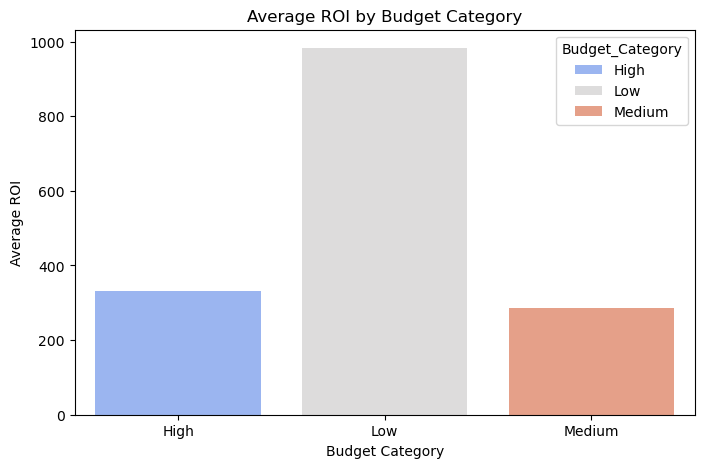

In [77]:
# Group by budget category and calculate average ROI
budget_roi = combined.groupby('Budget_Category')['ROI'].mean()

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(
    x=budget_roi.index,
    y=budget_roi.values,
    hue=budget_roi.index,  # Explicitly associate palette with hue
    palette="coolwarm",
    dodge=False,
   #legend=False
)
plt.title("Average ROI by Budget Category")
plt.xlabel("Budget Category")
plt.ylabel("Average ROI")
plt.show()


✅ Insight: This bar chart reveals which budget category (low, medium, or high) has the highest ROI, guiding decisions on budget allocation. that is the low budget category

#### Break-even Point

AttributeError: 'numpy.bool_' object has no attribute 'startswith'

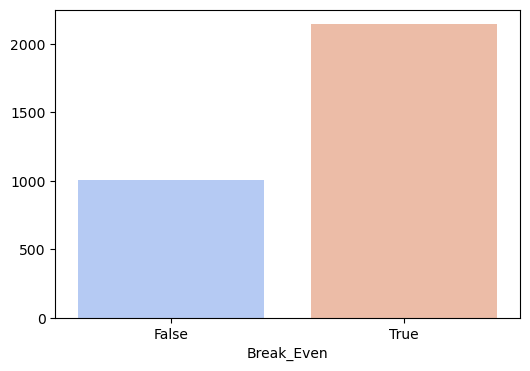

In [78]:
# Count break-even movies
break_even_counts = combined["Break_Even"].value_counts()
# Plot
plt.figure(figsize=(6, 4))
sns.barplot(
    x=break_even_counts.index,
    y=break_even_counts.values,
    hue=break_even_counts.index,  # Explicitly associate palette with hue
    palette="coolwarm",
    dodge=False,
   # legend=False
)
plt.xticks([0, 1], ["Did Not Break Even", "Broke Even"])
plt.title("Break-even Analysis")
plt.ylabel("Number of Movies")
plt.show()


✅ Insight: Determines how many movies recover their production costs.

### Bivariate analysis

#### Return on Investment (ROI)

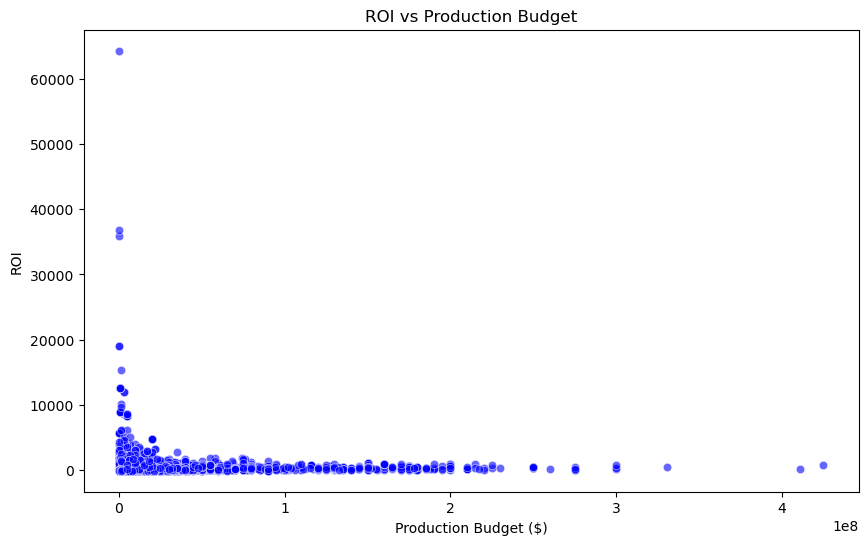

In [79]:
# Plot ROI vs. Budget
plt.figure(figsize=(10, 6))
sns.scatterplot(x='production_budget', y='ROI', data=combined, color='blue', alpha=0.6)
plt.title("ROI vs Production Budget")
plt.xlabel("Production Budget ($)")
plt.ylabel("ROI")
plt.show()

**Explanation**

**Key Observations:** 

**Negative Correlation Between Budget and ROI**

As the production budget increases (moving right along the X-axis), the ROI generally decreases, clustering near zero.
High-budget movies (above 100 million) show lower ROI, meaning they do not always generate proportionally high profits.

**High ROI for Low-Budget Films**

Some low-budget films (left side of the plot) show extremely high ROI, suggesting that low-budget films can be highly profitable.

**Wide ROI Variability in Low-Budget Films**

The leftmost side of the plot (low-budget films) has a large spread in ROI, meaning some films generate very high returns while others fail.

**Stable ROI for High-Budget Films**

The right side (high-budget films) has a narrower spread in ROI, suggesting that blockbuster movies have more predictable but lower returns.

**Insights & Implications:**

 * Higher budgets do not guarantee high ROI. Studios should carefully analyze the risk of large investments.
 * Low-budget films have higher profit potential but higher risk. Some achieve massive ROI, while others fail entirely.
 * Medium-budget films might offer a balance. Further analysis of budget categories is needed to determine an optimal investment range.

####  Profit Margin

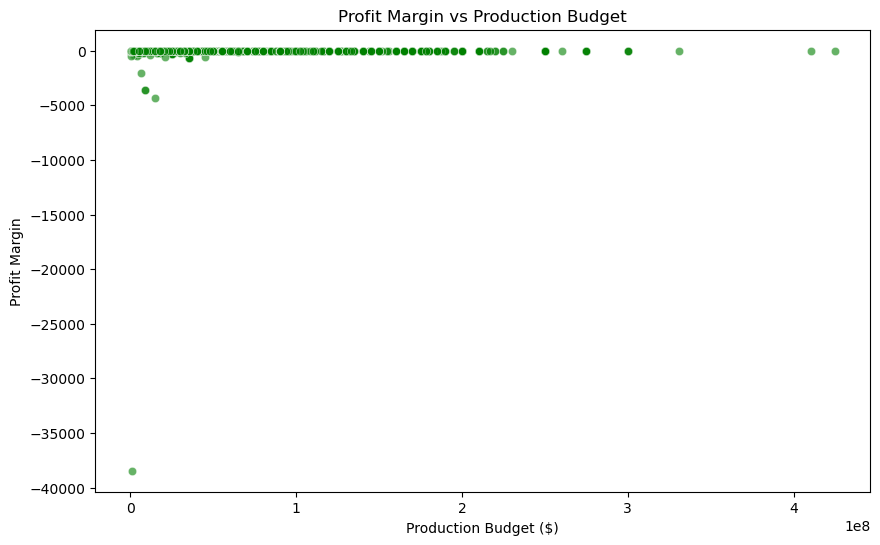

In [80]:
# Plot Profit Margin vs Budget
plt.figure(figsize=(10, 6))
sns.scatterplot(x='production_budget', y='Profit_Margin', data=combined, color='green', alpha=0.6)
plt.title("Profit Margin vs Production Budget")
plt.xlabel("Production Budget ($)")
plt.ylabel("Profit Margin")
plt.show()

**Explanation**
**Key Observations:**
**Profit Margins Cluster Near Zero**

Most data points are very close to the zero line, meaning many movies barely make a profit or just break even.

**High Profit Margins for Some Low-Budget Films**

The few low-budget films (left side of the plot) have significantly higher profit margins, indicating that some smaller productions generate substantial returns relative to their cost.

**Very Few High-Profit Outliers**

A handful of points show extremely high profit margins, meaning some films were produced at a low cost and earned massive box office revenue.

**High-Budget Films Have Lower and More Stable Profit Margins**

The right side of the plot (higher budgets) shows a more consistent trend with profit margins staying closer to zero, meaning big-budget films often operate on smaller percentage margins.

**Insights & Implications:**
 * Low-budget films have a higher potential for massive profit margins but also higher risk.
 * Big-budget films tend to have more stable but lower profit margins, likely due to high production and marketing costs.
 * Further investigation is needed to determine why some low-budget films achieve extreme profit margins while others do not.

#### Correlation Analysis
Steps:
 * Compute correlation between budget and revenue.
 * Visualize with a scatter plot.

Correlation between production budget and total revenue: 0.7783149247538605


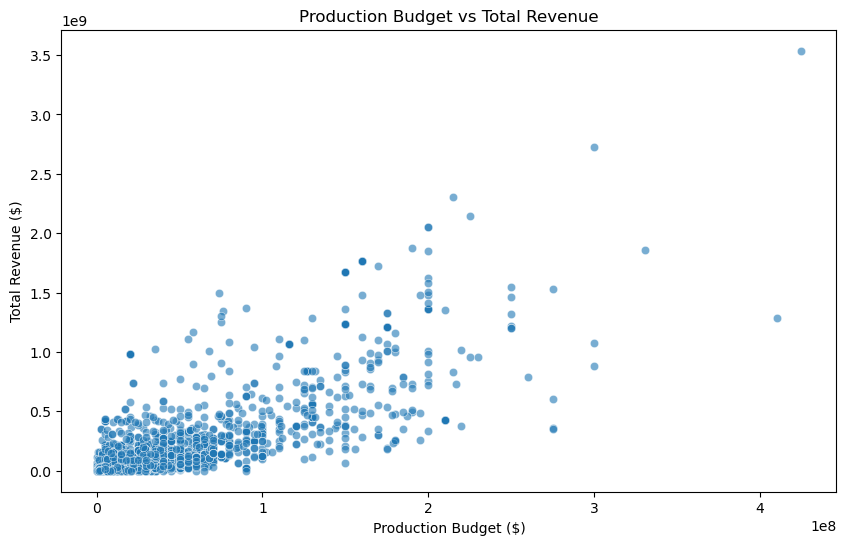

In [81]:
# Calculate correlation
correlation = combined['production_budget'].corr(combined['Total_gross'])
print(f"Correlation between production budget and total revenue: {correlation}")

# Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='production_budget', y='Total_gross', data=combined, alpha=0.6)
plt.title("Production Budget vs Total Revenue")
plt.xlabel("Production Budget ($)")
plt.ylabel("Total Revenue ($)")
plt.show()

✅ Insight: A high positive correlation indicates that higher budgets generally lead to higher revenue, but this doesn’t guarantee higher profitability.

## What role do ratings and audience engagement play in financial performance?

### Correlation Between Ratings and Revenue
We'll calculate the Pearson correlation coefficient between average_ratings and Total_gross to see if higher ratings correlate with higher box office performance.

In [ ]:
#import libraries
from scipy.stats import pearsonr
import statsmodels.api as sm

In [ ]:
# Correlation coefficient
corr_rating, p_value = pearsonr(combined['average_ratings'], combined['Total_gross'])
print(f"Correlation between Ratings and Revenue: {corr_rating:.4f}, p-value: {p_value:.4f}")

Interpretation:
 * Positive correlation: Higher ratings lead to higher revenue.
 * Negative correlation: Higher ratings do not influence revenue.
 * p-value < 0.05: The relationship is statistically significant.

In [ ]:
#plot
plt.figure(figsize=(8, 5))
sns.scatterplot(x=combined['average_ratings'], y=combined['Total_gross'], alpha=0.6)
sns.regplot(x=combined['average_ratings'], y=combined['Total_gross'], scatter=False, color='red')  # Regression line
plt.title("Relationship Between Ratings and Revenue")
plt.xlabel("Average Ratings")
plt.ylabel("Total Box Office Revenue")
plt.show()

**Scatter Distribution:** Each blue dot represents a movie, showing its rating and corresponding revenue.

**Trendline (Red Line):** A fitted regression line shows the overall trend, suggesting a slight positive correlation between ratings and revenue.

**Variance in Revenue:** While higher-rated movies tend to earn more, the spread of revenue is wide at each rating level, meaning other factors (e.g., budget, marketing) also influence earnings.

**High Revenue Outliers:** Some movies with ratings around 6-8 have exceptionally high revenues (over 1 billion), likely representing blockbuster hits.

**Interpretation:**

Movies with higher ratings generally earn more revenue, but ratings alone are not a strong predictor of box office success.

Other factors such as franchise value, marketing, and production budget significantly impact earnings.

### Audience Engagement and Box Office Performance
We’ll investigate the relationship between audience engagement (number_of_votes) and box office revenue.

In [ ]:
# Correlation between number of votes and revenue
corr_votes, p_value_votes = pearsonr(combined['number_of_votes'], combined['Total_gross'])
print(f"Correlation between Number of Votes and Revenue: {corr_votes:.4f}, p-value: {p_value_votes:.4f}")

Interpretation:
 * High correlation: More reviews may indicate greater audience engagement, leading to higher revenue.
 * Low correlation: Engagement might not be a significant factor in box office performance.

In [ ]:
#plot .
plt.figure(figsize=(8, 5))
sns.scatterplot(x=combined['number_of_votes'], y=combined['Total_gross'], alpha=0.6)
sns.regplot(x=combined['number_of_votes'], y=combined['Total_gross'], scatter=False, color='blue')
plt.title("Audience Engagement (Votes) vs. Box Office Revenue")
plt.xlabel("Number of Votes (Audience Engagement)")
plt.ylabel("Total Box Office Revenue")
plt.show()

**Scatter Distribution (Blue Dots)**

Each dot represents a movie.

A noticeable concentration of movies with low to moderate audience votes (below ~500,000) but varying revenue levels.

Some movies have very high votes (1.5M+) and high revenues (over 1B), likely indicating major blockbuster films.

**Regression Line (Dark Blue) and Confidence Interval (Shaded Area)**

The regression line shows a positive correlation between audience engagement and revenue.

The confidence interval suggests some variance, meaning while the trend is generally upward, individual cases may vary significantly.

**Interpretation and Insights:**
**Stronger Correlation Than Ratings vs. Revenue**
 * Unlike average ratings (which had a weak effect on revenue), the number of votes shows a clearer upward trend.
 * More engagement often means a larger audience, leading to higher revenue.

**Popular Movies Are More Profitable**
 * Movies with a high number of votes tend to generate more revenue.
 * This suggests that audience size (engagement) is a better predictor of box office success than just the rating score.

**Outliers Exist**
* Some movies with low votes still have high revenue (possibly due to marketing, franchise popularity, or blockbuster status).
 * Some movies with high votes but lower revenue might have gained popularity post-theatrical release (e.g., cult classics or streaming success).

**Causation vs. Correlation**
 * High engagement likely leads to higher revenue, but marketing, production budget, and franchise status also contribute significantly.


### Ratings Distribution by Revenue

In [ ]:
#plot
plt.figure(figsize=(10, 6))
sns.boxplot(
    x=combined['movie_rating'],
    y=combined['Total_gross'],
    hue=combined['movie_rating'],  # Explicitly associate palette with hue
    palette="coolwarm"
)
plt.title("Box Office Revenue Across Different Movie Rating Categories")
plt.xlabel("Movie Rating")
plt.ylabel("Total Box Office Revenue")
plt.xticks(rotation=45)
plt.show()


**Key Observations:**
1. Box Plot Interpretation
 * The x-axis represents movie rating categories (Low, Average, High).
 * The y-axis represents total box office revenue.
 * The box represents the interquartile range (IQR) (middle 50% of the data).
 * The horizontal line inside the box is the median revenue for each category.
 * The whiskers extend to data points within 1.5 times the IQR.
 * The dots outside the whiskers are outliers, indicating extreme revenue values.

2. Insights from the Data

a) Revenue Distribution Across Ratings
 * Low-rated movies (blue box)
    * Tend to have lower revenue overall, with most movies earning relatively little.
    * A few outliers (successful low-rated films) reach high revenue, but these are rare.

 * Average-rated movies (gray box)
   * Show a slightly higher median revenue than low-rated movies.
   * There is a broader spread of revenue values, with some movies earning over 2 billion.
   * The number of high-revenue outliers is significant, suggesting some mid-rated films perform exceptionally well.

* High-rated movies (orange box)
   * Have the highest median revenue, meaning most high-rated movies tend to perform better.
   * However, the spread is also wide, indicating that some high-rated films do not always achieve high box office revenue.
   * The number of outliers is similar to the "Average" category, suggesting that critical acclaim does not always guarantee massive earnings.

**Key Takeaways**
 * High-rated movies generally earn more revenue, but the advantage is not absolute.
   * While median revenue increases with rating, the presence of high-revenue outliers in both average- and low-rated films suggests that other factors (e.g., budget, marketing, franchise strength) play a critical role.

* Some low-rated films can still perform well.
   * The presence of outliers in the "Low" category suggests that certain movies succeed despite poor reviews—possibly due to strong marketing, established fan bases, or niche appeal.

* The “Average” rating category has the highest variation.
   * Many blockbusters fall into this category, showing that critical reception is not the only predictor of financial success.

**Recommendations for the Film Industry**
1. Invest in High-Quality Productions (But Don't Ignore Other Factors)
 * Since higher-rated movies tend to perform better on average, studios should prioritize quality storytelling, strong scripts, and production value.
 * However, high ratings do not guarantee high revenue, so marketing and distribution strategies remain crucial.

2. Focus on Marketing and Franchise Potential
 * Some low-rated movies (outliers) achieve high revenue, likely due to franchise popularity or strong branding (e.g., superhero movies, action franchises).
 * Marketing campaigns, strategic release timing, and audience engagement play a crucial role in box office performance.

3. Target Broad Audiences for Mid-Tier Movies
 * Mid-rated films (5-7/10 range) still have strong revenue potential.
 * Instead of focusing only on critic scores, studios should leverage audience preferences, genre appeal, and accessibility to maximize profits.

4. Utilize Streaming and Digital Platforms
* Movies that do not perform well in theaters can gain popularity post-release through streaming services, leading to increased revenue over time.
 * Investing in alternative revenue streams (digital rentals, merchandise, special editions) can boost profitability for movies that underperform in theaters.

**Final Thoughts**

While higher ratings generally lead to better revenue, there is no absolute guarantee of success. Successful films often rely on a combination of quality, marketing, franchise value, and audience reach. Studios should adopt a balanced strategy, focusing not just on critic scores but also on audience preferences, effective distribution, and strong marketing efforts.

## Are there seasonal or year-based trends that affect revenue potential

In [ ]:
# Group by month to see revenue trends
monthly_revenue =combined.groupby('month')['Total_gross'].mean()

# Plot monthly revenue trends
plt.figure(figsize=(10, 5))
sns.lineplot(x=monthly_revenue.index, y=monthly_revenue.values, marker="o", color="b")
plt.title("Average Box Office Revenue by Month")
plt.xlabel("Month")
plt.ylabel("Average Box Office Revenue")
plt.xticks(range(1, 13), 
           ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
            'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid()
plt.show()

**Highest Revenue:**
 * The highest average revenue occurs in June, followed closely by May and July.
**Lowest Revenue:**
 * The lowest average revenue occurs in October, followed by April.
**Trends:**
 * The revenue generally increases from January to June, drops significantly in August, experiences a slight increase in September, and then drops again in October. There's a sharp rise in November followed by a decline in December.

### Year-on-Year Revenue Analysis
This analysis identifies revenue trends over the years.

In [ ]:
# Yearly revenue trend
yearly_revenue = combined.groupby('year')['Total_gross'].sum()
#plot
plt.figure(figsize=(10, 5))
sns.lineplot(x=yearly_revenue.index, y=yearly_revenue.values, marker="o", color="g")
plt.title("Total Box Office Revenue Over the Years")
plt.xlabel("Year")
plt.ylabel("Total Box Office Revenue")
plt.grid()
plt.show()

**Exponential Growth (2009-2016):**
 * A sharp rise in revenue begins around 2009, indicating a significant shift in the industry. 

**Peak and Decline (2017-2020):**
 * The revenue reaches its zenith around 2017, followed by a noticeable decline. 

**Interpretations:**
 * **Industry Transformation:**
   * The drastic growth from 2009 onwards indicates a transformative period in the film industry, likely driven by technological advancements and changing consumer preferences.

**Impact of External Factors:**
 * The decline after 2017 suggests that the industry is susceptible to external forces such as economic downturns, global events, and competition from alternative entertainment sources.


 ### Holiday/Peak Season Performance
We categorize movies into seasons (Winter, Spring, Summer, Fall) and compare revenues.

In [ ]:
# Group by season
seasonal_revenue = combined.groupby('season')['Total_gross'].mean()

# Sort the data in descending order
sorted_seasonal_revenue = seasonal_revenue.sort_values(ascending=False)

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(
    x=sorted_seasonal_revenue.index,
    y=sorted_seasonal_revenue.values,
    hue=sorted_seasonal_revenue.index,  # Assign x variable to hue to avoid FutureWarning
    palette="coolwarm",
    dodge=False,
    legend=False  # Suppress the legend
)
plt.title("Average Box Office Revenue by Season")
plt.xlabel("Season")
plt.ylabel("Average Box Office Revenue")
plt.xticks(rotation=45)
plt.show()



### Release Timing Analysis: Summer vs. Holiday Releases
This analysis compares box office performance of summer blockbusters vs. holiday releases.

In [ ]:
# Boxplot to compare revenues
plt.figure(figsize=(8, 5))
sns.boxplot(
    x=combined['peak_season'],
    y=combined['Total_gross'],
    hue=combined['peak_season'],  # Explicitly assign x to hue
    palette="coolwarm",
    dodge=False,
    legend=False  # Suppress legend to avoid unnecessary output
)
plt.title("Revenue Comparison: Peak vs. Non-Peak Releases")
plt.xlabel("Season Category")
plt.ylabel("Box Office Revenue")
plt.show()


**Explanation:**
**The boxes:** represent the interquartile range (IQR), which contains the middle 50% of the data. The bottom of the box is the first quartile (25th percentile), the top is the third quartile (75th percentile), and the line inside the box is the median (50th percentile).

**The whiskers:** extend from the box to the minimum and maximum values within 1.5 times the IQR.

**The circles:** represent outliers, which are data points that fall outside the whiskers.

**Interpretation:**

**Peak season releases:**
 * tend to have higher median revenue than non-peak releases, indicating that they generally make more money.
 * also have a wider range of revenue, with more outliers, indicating that there's more variability in their performance. Some peak season movies can be extremely successful, while others may not perform as well.

**Non-peak season releases:**
 * have a narrower range of revenue and fewer outliers, indicating that their performance is more consistent.

## What are the most profitable release windows?

### Revenue Distribution by Week/Month
We will analyze how box office revenue varies month by month.

In [ ]:
# Group by month to analyze revenue trends
monthly_revenue = combined.groupby('month')['Total_gross'].mean()

# Plot Monthly Revenue Trends

plt.figure(figsize=(10, 5))
sns.barplot(
    x=monthly_revenue.index,
    y=monthly_revenue.values,
    hue=monthly_revenue.index,  # Explicitly assign x variable to hue
    palette="coolwarm",
    dodge=False,
    legend=False  # Suppress legend to avoid unnecessary output
)
plt.title("Average Box Office Revenue by Month")
plt.xlabel("Month")
plt.ylabel("Average Revenue")
plt.xticks(range(1, 13), 
           ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
            'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid()
plt.show()


Insights: This will highlight which months tend to generate the most revenue.

### Profitability by Release Date (ROI Analysis)
Next, we assess Return on Investment (ROI) across different release periods.

In [ ]:
# Group by month and calculate average ROI
monthly_roi = combined.groupby('month')['ROI'].mean()

plt.figure(figsize=(10, 5))
sns.lineplot(x=monthly_roi.index, y=monthly_roi.values, marker="o", color="g")
plt.title("Average ROI by Month")
plt.xlabel("Month")
plt.ylabel("Average ROI")
plt.xticks(range(1, 13), 
           ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
            'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid()
plt.show()

The x-axis represents the months of the year, from January to December. 

The y-axis represents the average ROI, ranging from 300 to 1000. 

The highest average ROI occurs in March, reaching approximately 960.

The lowest average ROI occurs in December, at around 300.

There's a significant fluctuation in average ROI throughout the year, with peaks in March and July, and troughs in February and December. 

### Competitor Analysis: Release Timing of Top Films
To understand competition, we analyze when the highest-grossing films are released.

In [ ]:
# Find top 10% highest-grossing films
top_movies = combined.nlargest(int(len(combined) * 0.1), 'Total_gross')

# Count releases per month for top films
top_releases_per_month = top_movies['month'].value_counts().sort_index()

# Plot
plt.figure(figsize=(10, 5))
sns.barplot(
    x=top_releases_per_month.index,
    y=top_releases_per_month.values,
    hue=top_releases_per_month.index,  # Assign x to hue to avoid FutureWarning
    palette="coolwarm",
    dodge=False,
    legend=False  # Suppress the legend
)
plt.title("Number of Top-Grossing Films Released by Month")
plt.xlabel("Month")
plt.ylabel("Count of High-Grossing Films")
plt.xticks(rotation=45)
plt.show()


Insights: If most top films are released during summer or holiday periods, it suggests a strategic pattern in release timing

### Average Revenue by Release Window
We categorize movies into seasons to compare revenue performance.

In [ ]:
# Average revenue per season
seasonal_revenue = combined.groupby('season')['Total_gross'].mean()

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(
    x=seasonal_revenue.index,
    y=seasonal_revenue.values,
    hue=seasonal_revenue.index,  # Assign x variable to hue to avoid the FutureWarning
    palette="coolwarm",
    dodge=False,
    legend=False  # Suppress legend
)
plt.title("Average Box Office Revenue by Season")
plt.xlabel("Season")
plt.ylabel("Average Revenue")
plt.show()

**The bar graph illustrates the average box office revenue across different seasons.**
**Here's a breakdown:**

 * **Summer:**
   * This season boasts the highest average box office revenue, exceeding 175 million dollars.

 * **Spring:**
   * It follows with an average revenue slightly above 150 million dollars.

* **Winter:**
   * The season secures the third spot with an average revenue around 150 million dollars.

* **Fall:**
   * It records the lowest average revenue, slightly surpassing 125 million dollars.

This data highlights the significant impact of the season on movie earnings, with summer being the most lucrative period for the film industry.

# Preprocessing
Preprocessing is the crucial first step in preparing raw data for analysis or machine learning models. It involves cleaning, transforming, and structuring data to improve accuracy and efficiency.

## import libraries

In [ ]:
#import the libraries
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score
import scipy.stats as statsmodels

# Preprocessing 

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# time 
import time

## clean the dataset

In [ ]:
#check the dataset info
combined.info()

In [ ]:
#drop irrelevant columns
combined = combined.drop(columns=['release_date','title','movie_age_label','quarter','movie_length', 'genres_list',
       'Break_Even','quarter','genres','genre_combined','genre_1'], axis=1, errors='ignore')
#combined=combined.drop(columns=['genres'],axis=1,errors='ignore')
#combined=combined.drop(columns=['genre_1'],axis=1,errors='ignore')
#combined=combined.drop(columns=['genre_combined'],axis=1,errors='ignore')

In [ ]:
#check columns
combined.columns

In [ ]:
#check dataset info
combined.info()

In [ ]:
combined['ROI']=round(combined['ROI'],0)
combined['Profit_Margin']=round(combined['ROI'],0)

In [ ]:
# Change data types
combined['ROI'] = combined['ROI'].astype('int64')
combined['Profit_Margin'] = combined['Profit_Margin'].astype('int64')


In [ ]:
#view dataset
combined.head()

In [ ]:
#check for missing values
combined.isna().sum()

In [ ]:
# List of numerical features
numerical_features = ['number_of_votes', 'production_budget', 'domestic_gross', 'worldwide_gross', 
                      'Total_gross', 'runtime_minutes', 'average_ratings']

# Plot histograms for all numerical features
plt.figure(figsize=(15, 10))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(3, 3, i)  # Creating a 3x3 grid
    sns.histplot(combined[feature], bins=50, kde=True, color="blue")
    plt.title(f"Distribution of {feature}")
plt.tight_layout()
plt.show()

In [ ]:
from scipy.stats import skew

# Calculate skewness for all numerical columns
skewness_values = combined[numerical_features].apply(lambda x: skew(x, nan_policy='omit'))
print(skewness_values.sort_values(ascending=False))  # Sort to see most skewed first


In [ ]:
# Select features with high skewness (skewness > 1)
skewed_features = skewness_values[skewness_values > 1].index.tolist()
print("\nHighly Skewed Features:\n", skewed_features)

# Apply log transformation safely (using log1p to handle zeros)
combined[skewed_features] = combined[skewed_features].apply(lambda x: np.log1p(x))

# Recalculate skewness after transformation
new_skewness = combined[skewed_features].apply(lambda x: skew(x, nan_policy='omit'))
print("\nNew Skewness After Log Transformation:\n", new_skewness.sort_values(ascending=False))

In [ ]:
# List of numerical features
numerical_features = ['number_of_votes', 'production_budget', 'domestic_gross', 'worldwide_gross', 
                      'Total_gross', 'runtime_minutes', 'average_ratings', 'ROI', 'Profit_Margin']

# Plot histograms for all numerical features
plt.figure(figsize=(15, 10))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(3, 3, i)  # Creating a 3x3 grid
    sns.histplot(combined[feature], bins=50, kde=True, color="blue")
    plt.title(f"Distribution of {feature}")
plt.tight_layout()
plt.show()

In [ ]:
combined.dropna(inplace=True)

# modelling

## onehot encoding

In [ ]:
from sklearn.preprocessing import OneHotEncoder
# Create a list of columns to encode
categorical_columns = ['season', 'movie_rating','Budget_Category', 'peak_season']

# Create a copy of the DataFrame with the selected columns
encoded_df = combined.copy()

# Create an instance of OneHotEncoder
# sparse=False to produce a dense array and drop='first' to drop the first category of each variable
encoder = OneHotEncoder(sparse_output=False, drop='first')

# Iterate through each categorical column

for column in categorical_columns:
    # Fit and transform the selected column
    one_hot_encoded = encoder.fit_transform(encoded_df[[column]])

    # Create a DataFrame with one-hot encoded columns
    one_hot_df = pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out([column]))

    # Concatenate the one-hot encoded DataFrame with the original DataFrame
    encoded_df = pd.concat([encoded_df, one_hot_df], axis=1)

    # Drop the original categorical column
    encoded_df = encoded_df.drop([column], axis=1)

# Display the resulting DataFrame
combined_1= encoded_df.copy()



In [ ]:
# For default view 
pd.set_option("display.max_columns", 100)
combined_1.head()

## Feature Selection: Identify the features that will be used for the model.

In [ ]:
# Select features and target variable
X = combined_1.drop('production_budget', axis=1)  # X is the target variable(independent)
y = combined_1['production_budget']#dependent variable

## splitting data

In [ ]:
# split the data into training set and testing split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=127)

## Scaling the features

In [ ]:
# Initialize the scaler
scaler = MinMaxScaler()#It scales the data so that all features are in the range between 0 and 1 (by default).

# Fit and transform the training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform the testing data
X_test_scaled = scaler.transform(X_test)

## modeling

In [ ]:
!pip install lightgbm
!pip install catboost
!pip install xgboost


#import libraries
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from xgboost import XGBRegressor

# Define the model 
models = {
    'linear regressor':LinearRegression(),
    'LGBM Regressor': LGBMRegressor(verbose=0),
    'CatBoost Regressor': CatBoostRegressor(verbose=0),
    'XGB Regressor': XGBRegressor()
}

# Initialize a dictionary to store results
results = {
    'Model': [], 'MAE': [], 'MSE': [], 'RMSE': [], 'MAPE': [], 'R2': [],
    'Training Time (s)': [], 'Prediction Time (s)': []
}

# Create a loop to iterate over the models
for model_name, model in models.items():
    # Measure the training time
    start_time = time.time()
    model.fit(X_train_scaled, y_train)
    training_time = time.time() - start_time

    # Measure the prediction time
    start_time = time.time()
    y_pred = model.predict(X_test_scaled)
    prediction_time = time.time() - start_time

    # Evaluating the model
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
    r2 = r2_score(y_test, y_pred)

    # Store results in a dictionary
    results['Model'].append(model_name)
    results['MAE'].append(mae)
    results['MSE'].append(mse)
    results['RMSE'].append(rmse)
    results['R2'].append(r2)
    results['MAPE'].append(mape)
    results['Training Time (s)'].append(training_time)
    results['Prediction Time (s)'].append(prediction_time)

# Create a DataFrame for results in dictionary
results_combined = pd.DataFrame(results)

# Display the results
results_combined

**The table above compares the performance of different regression models based on several evaluation metrics.** 

**Metrics:**

 * **MAE (Mean Absolute Error):**
   * Represents the average absolute difference between the predicted and actual values. Lower MAE indicates better accuracy.

 * **MSE (Mean Squared Error):**
   * Measures the average squared difference between the predicted and actual values. MSE gives higher weight to larger errors.

 * **RMSE (Root Mean Squared Error):**
   * The square root of MSE, providing an interpretable metric in the same units as the target variable. Lower RMSE indicates better accuracy.

 * **MAPE (Mean Absolute Percentage Error):**
   * Represents the average percentage difference between the predicted and actual values. Lower MAPE indicates better accuracy.

 * **R2 (R-squared):**
   * Measures the proportion of variance in the target variable that is explained by the model. Higher R2 indicates a better fit.

 * **Training Time (s):**
   * The time taken by the model to train on the data.

 * **Prediction Time (s):**
   * The time taken by the model to make predictions on new data.

**Interpretation:**

 * **CatBoost Regressor:**
   * Achieves the lowest MAE, MSE, RMSE, and MAPE, indicating the best overall performance in terms of accuracy. However, it has the longest training time.

 * **LGBM Regressor:**
   * Performs well across all metrics, with a slightly higher MAE and RMSE compared to CatBoost. It has a faster training time than CatBoost but slower than XGBoost.

 * **XGBoost Regressor:**
   * Performs similarly to LGBM Regressor, with slightly higher errors. It has the fastest training time among the three.

 * **Linear Regressor:**
   * Has the highest errors across all metrics, indicating the least accurate performance. It has a relatively fast training time.

## visualization of the best model

In [ ]:
import plotly.express as px

# Plotting a grouped bar graph
fig = px.bar(results_combined, x='Model',
             y=['MAE', 'MSE', 'RMSE', 'MAPE', 'R2', 'Training Time (s)', 'Prediction Time (s)'],
             labels={'value': 'Metric Value'}, 
             title='Best Model',
             barmode = 'group')

# Update layout to vary length and width
fig.update_layout(
    width=1000,  # Set the width of the entire plot
    height=700,  # Set the height of the entire plot
    bargap=0.2,  # Set the gap between bars
)
             
fig.show()

## prediction vs actual for all the models

In [ ]:
# Define the grid layout
rows, cols = 3, 3

# Specify the figure size for the entire grid
plt.figure(figsize=(15, 12))

# Loop over models
for idx, (model_name, model) in enumerate(models.items(), 1):
    # Fit the model to training data
    model.fit(X_train_scaled, y_train)

    # Make predictions on the testing data
    y_pred = model.predict(X_test_scaled)

    # Scatter plot of Predictions vs. Actual Values for each model
    plt.subplot(rows, cols, idx)
    plt.scatter(y_test, y_pred, alpha=0.5)
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2)  # Diagonal line for perfect predictions
    plt.title(f'{model_name} Predictions vs. Actual Values')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')

# Adjust layout
plt.tight_layout()
plt.show()

**The graph showcases the performance of four different regression models by comparing their predicted values to the actual values.**

**Interpretation:**

 * **Ideal Scenario:**
   * The red dashed line represents the perfect prediction where predicted values equal actual values. The closer the data points are to this line, the better the model's performance.

 * **Model Performance:**
   * All four models demonstrate good performance, with the data points closely aligned with the diagonal line. This suggests that the models are accurately predicting the target variable.

 * **Comparison:**
   * Among the four, the XGB Regressor seems to have the tightest clustering of points around the diagonal line, indicating it might be the most accurate model in this comparison.

Overall, the graph illustrates the accuracy of the regression models in predicting the target variable.

## Residuals

In [ ]:
# Define the grid layout
rows, cols = 3, 3
plt.figure(figsize=(15, 12))

# Loop over models
for idx, (model_name, model) in enumerate(models.items(), 1):
    # Fit the model to training data
    model.fit(X_train_scaled, y_train)

    # Make predictions on the testing data
    y_pred = model.predict(X_test_scaled)

    # Calculate residuals
    residuals = y_test - y_pred

    # Residual plot for each model
    plt.subplot(rows, cols, idx)
    plt.scatter(y_pred, residuals, alpha=0.5)
    plt.axhline(y=0, color='red', linestyle='--', linewidth=2)
    plt.title(f'{model_name} Residual Plot')
    plt.xlabel('Predicted Values')
    plt.ylabel('Residuals')

# Adjust layout
plt.tight_layout()
plt.show()

**Understanding Residual Plots**
 * A residual plot is a diagnostic tool used in regression analysis to assess the quality of the model fit. 
 * It plots the residuals (the difference between the observed values and the predicted values) on the vertical axis against the predicted values on the horizontal axis.

**Ideal Residual Plot**
 * In an ideal scenario, the points in a residual plot should be randomly scattered around the horizontal line at zero, indicating that the model's errors are random and have a mean of zero. 
 * This suggests that the model is capturing the underlying pattern in the data well.

**Interpreting the Plots**

 * **Linear Regressor:**
   * The plot shows a slight funnel shape, indicating that the model's errors are not constant across the range of predicted values. There might be some non-linearity in the data that the linear model is not capturing.

 * **LGBM Regressor:**
   * This plot shows a relatively random pattern, indicating a good fit for the model. However, there are a few outliers, which are points that are far away from the zero line. These outliers might be due to unusual data points or errors in the data.

 * **CatBoost Regressor:**
   * This plot is similar to the LGBM Regressor, indicating a good fit with a few outliers.

 * **XGB Regressor:**
   * The plot shows a similar pattern to the LGBM and CatBoost Regressors, indicating a good fit with a few outliers.

**Overall Interpretation**
 * Based on the residual plots, all four models seem to provide a reasonable fit to the data.
 * However, the non-linear pattern observed in the Linear Regressor plot suggests that a more complex model might be able to capture the data better. 
 * The LGBM, CatBoost, and XGB Regressors all show a random pattern, indicating that they are capturing the underlying patterns in the data well. 
 * However, the presence of outliers suggests that further investigation of these data points might be necessary.

## Kernel density

In [ ]:
# Kernel Density Plot
# Define the grid layout
rows, cols = 3, 3
plt.figure(figsize=(15, 12))

# Loop over models
for idx, (model_name, model) in enumerate(models.items(), 1):
    # Fit the model to training data
    model.fit(X_train_scaled, y_train)

    # Make predictions on the testing data
    y_pred = model.predict(X_test_scaled)

    # Calculate residuals
    residuals = y_test - y_pred

    # Kernel density plot for residuals of each model
    plt.subplot(rows, cols, idx)
    sns.kdeplot(residuals, fill=True)
    plt.title(f'{model_name} Kernel Density Plot')
    plt.xlabel('Residuals')
    plt.ylabel('Density')

# Adjust layout
plt.tight_layout()
plt.show()

**Here's an explanation and interpretation:**

**What is a kernel density plot?**
 * A kernel density plot is a way to visualize the probability density function of a continuous variable. 
 * It's a smoothed version of a histogram, providing a clearer picture of the underlying distribution.

**What are residuals?**
 * Residuals are the differences between the actual observed values and the values predicted by a regression model. 
 * Ideally, the residuals should be normally distributed with a mean of zero, indicating that the model is capturing the underlying patterns well.

**Interpretation of the plots:**
 * **All four plots:**
   * They all exhibit a roughly bell-shaped curve, suggesting that the residuals are approximately normally distributed, which is a good sign for the models' performance.
   * The peaks of the curves are centered around zero, further supporting the assumption that the models are unbiased.

**Comparing the plots:**
 * The XGB Regressor appears to have the narrowest and tallest peak, indicating that its residuals are more tightly clustered around zero. This suggests that the XGB Regressor is potentially the most accurate of the four models.
 * The Linear Regressor and LGBM Regressor have slightly wider distributions, indicating a bit more variability in their predictions.
 * The CatBoost Regressor has a slightly wider distribution than the XGB Regressor, but still narrower than the Linear and LGBM Regressors.
 Overall, the plots suggest that all four regression models are performing reasonably well, with the XGB Regressor potentially having the best performance.

our best model so far is XGB regressor so we'd look at it n evaluate it individually

# xgboost Model 

In [ ]:
# Initialize the XGB Regressor
XGB_model = XGBRegressor()

# Initialize a dictionary to store results
results = {
    'Model': [], 'MAE': [], 'MSE': [], 'RMSE': [], 'MAPE': [], 'R2': [],
    'Adjusted R2': []
}

# Fit the model
XGB_model.fit(X_train_scaled, y_train)

# Make prediction
y_pred = XGB_model.predict(X_test_scaled)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
r2 = r2_score(y_test, y_pred)

# Calculate Adjusted R2
n = X_test_scaled.shape[0]  # Number of samples
p = X_test_scaled.shape[1]  # Number of features
adjusted_r2 = 1 - ((1 - r2) * (n - 1) / (n - p - 1))

# Display the metrics
print("Model Evaluation Metrics:")
print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"MAPE: {mape:.2f}")
print(f"R²: {r2:.2f}")
print(f"Adjusted R²: {adjusted_r2:.2f}")

Model Evaluation Metrics

| Metric             | Value   | Interpretation                                                                 |
|--------------------|---------|-------------------------------------------------------------------------------|
| **MAE**            | 0.22    | On average, predictions are **0.22 units** away from actual values. Good result! ✅ |
| **MSE**            | 0.27    | Low MSE indicates small squared errors, meaning the model makes few large mistakes. ✅ |
| **RMSE**           | 0.52    | Predictions deviate **by about 0.52 units** from actual values on average. A lower RMSE is ideal. ✅ |
| **MAPE**           | 1.57%   | Model's average percentage error is **1.57%**, meaning it's **highly accurate**. ✅ |
| **R²**             | 0.92    | The model explains **92% of the variance** in the target variable, indicating a **strong fit**. ✅ |
| **Adjusted R²**    | 0.92    | High value confirms the model is effective **even after adjusting for multiple predictors**. ✅ |

**Overall Evaluation:**
- **The model is performing very well** with an **R² of 0.92**, meaning it explains **92% of the variation** in the target variable.
- **Low error values (MAE = 0.22, RMSE = 0.52, MAPE = 1.57%)** indicate high accuracy.
- **Adjusted R² = 0.92** suggests that adding more features didn’t significantly degrade performance.


## Model Evaluation

## Predicted vs Actual

In [ ]:
#plot
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Prices")
plt.show()

**This scatter plot compares actual prices to predicted prices, likely from a predictive model.**

**Interpretation:**
 * The red dashed line represents the ideal scenario: where the predicted price perfectly matches the actual price.
 * The blue dots represent individual data points, showing the actual price on the x-axis and the corresponding predicted price on the y-axis.
 * The closer the blue dots are to the red line, the more accurate the predictions are.
 * In this case, the dots are clustered closely around the red line, indicating a strong correlation between predicted and actual prices. This suggests the model is performing well in predicting prices.

## Residuals

In [ ]:
# Calculate residuals
residuals = y_test - y_pred

# Residual plot for each model
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--', linewidth=2)
plt.title('Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')

# Adjust layout
plt.tight_layout()
plt.show()

**This is a residual plot, a crucial diagnostic tool used in regression analysis to assess the quality of a model's fit.**

**Explanation:**
 * The x-axis represents the predicted values from the regression model.
 * The y-axis represents the residuals, which are the differences between the actual observed values and the predicted values.
 * The red line represents the zero line, indicating where residuals would be if the model perfectly predicted all data points.

**Interpretation:**
 * **Randomness:**
   * Ideally, the points in a residual plot should be randomly scattered around the zero line without any discernible pattern. This indicates that the model's errors are random, which is a key assumption in regression analysis.

 * **Homoscedasticity:**
   * The spread of the residuals should be relatively constant across the entire range of predicted values. This means the model's accuracy is consistent across different levels of the predictor variables.

 * **No Outliers:**
   * Extreme outliers can significantly affect the regression model's fit.

**In this particular graph:**
 * The residuals appear to be randomly scattered around the zero line with no obvious patterns, suggesting the model is a good fit.
 *  The spread of the residuals appears to be fairly constant, indicating homoscedasticity.
 * There might be a few potential outliers, but overall, the plot suggests the regression model is a good fit for the data.

## Normality Assumption

In [ ]:
# KDE plot 
# Kernel density plot for residuals of each model
sns.kdeplot(residuals, fill=True)
plt.title('XGB Kernel Density Plot')
plt.xlabel('Residuals')
plt.ylabel('Density')

# Adjust layout
plt.tight_layout()
plt.show()

**This is a kernel density plot of residuals from an XGBoost model.**

**Explanation:**
 * **Kernel density estimation (KDE):**
    * This is a method to visualize the distribution of a dataset by smoothing out individual data points into a continuous curve.

 * **Residuals:**
   * These are the differences between the actual values and the values predicted by the model.

 * **XGBoost:**
   * This is a powerful machine learning algorithm known for its accuracy and speed.

**Interpretation:**
 * **Shape:**
   * The plot shows a sharp peak around zero, indicating that most predictions are close to the actual values. This is desirable, as it suggests the model is making accurate predictions.

 * **Tails:**
   * The tails of the distribution are relatively thin, meaning there are few extreme residuals (large prediction errors). This is also a good sign, as it indicates that the model is performing well even on data points that are different from the ones it was trained on.

**Symmetry:**
The distribution is nearly symmetrical, which indicates that the model is not biased towards over-predicting or under-predicting.

## Histogram plot for Normality

In [ ]:
#plot
sns.histplot(residuals, fill=True)
plt.title('XGB Kernel Density Plot')
plt.xlabel('Residuals')
plt.ylabel('Density')

# Adjust layout
plt.tight_layout()
plt.show()

**This is a kernel density plot of residuals from a XGB model.**

**Explanation:**

 * **Residuals:**
   * The difference between the actual observed values and the values predicted by the model.

 * **Kernel Density Plot:**
    * A smoothed histogram that visualizes the distribution of a dataset.

 * **Random Forest:**
   * An ensemble machine learning method that builds multiple decision trees and combines their predictions.

**Interpretation:**

 * **Shape:**
   * The distribution is roughly centered around zero, which is ideal for a well-performing model. The high peak indicates that most of the residuals are close to zero, suggesting that the model is making accurate predictions for most data points.

 * **Spread:**
   * The spread of the distribution provides insight into the model's accuracy. A narrow distribution implies that the model's predictions are consistently close to the actual values, while a wide distribution suggests greater variability in the model's performance.

 * **Outliers:**
   * The presence of any long tails or points far from zero indicates outliers, where the model's predictions were significantly off. These outliers could be due to noisy data, unusual patterns in the data, or limitations of the model itself.

## Q-Q Plot

In [ ]:
import scipy.stats as stats
stats.probplot(residuals, dist="norm", plot=plt)
plt.title("Q-Q Plot")
plt.show()

**This is a Q-Q plot (Quantile-Quantile plot), a graphical tool used to assess whether a dataset follows a particular theoretical distribution, like the normal distribution.**

**How to interpret it:**
 * **The x-axis:**
    * Represents the theoretical quantiles of the distribution you're comparing against (often the standard normal distribution).

 * **The y-axis:**
   * Represents the ordered values (quantiles) of your observed data.

 * **The red line:**
   * Represents the line of perfect fit. If the points fall exactly on this line, it indicates that your data perfectly matches the theoretical distribution.

**Interpreting this specific Q-Q plot:**
 * **The points deviate from the line at both tails:**
   * This indicates that the data has heavier tails than the normal distribution. In other words, there are more extreme values (both high and low) in the data than would be expected in a normal distribution.

 * **The points generally follow the line in the middle:**
   * This suggests that the data is reasonably close to normal in the central region.

## Feature importance 

In [ ]:
# Get Feature Importance
feature_importance = XGB_model.feature_importances_

# Create a DataFrame to view feature importance
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance})

# Sort by Importance (descending order) and limit to the top 20 most important features
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False).head(20)

# Plot Horizontal Bar Graph
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('XGB Regressor Feature Importance')
plt.gca().invert_yaxis()  # Invert the y-axis to have most important at the top
plt.tight_layout()  # Adjust layout for better visualization
plt.show()


This feature importance graph shows the relative importance of different features in a machine learning model. 

The features are listed on the y-axis, and their importance is indicated by the length of the bars on the x-axis. 

**Interpretation:** 

 * **Top Features:**
   * The most important feature in this model is "Budget_Category_Low," followed closely by "Budget_Category_Medium." 
   * This suggests that the budget category of a movie plays a significant role in predicting the target variable (which is not specified in the graph).
 * **Other Important Features:**
   * Features like "domestic_gross," "ROI," and "worldwide_gross" also have a notable impact on the model's predictions.

 * **Least Important Features:**
   * Features at the bottom of the graph, such as "movie_rating_low" and "Profit_Margin," have minimal influence on the model's predictions. 

**Uses of this Graph:**

 * **Feature Selection:** 
   * This graph can help you select the most relevant features for your model. You might choose to keep only the top few features, or experiment with different combinations to find the optimal set. 

 * **Model Understanding:**
   * By examining the feature importance, you can gain insights into how the model makes predictions and which factors are most influential. 
 
 * **Communication:**
   * This graph can be used to communicate the model's behavior to stakeholders, helping them understand which features are driving the predictions. 

Recomendations
* drop the features with least importance and redo the model for better results